#**IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
# Importando as bibliotecas utilizadas e métodos ou atributos utilizados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from datetime import datetime

**IMPORTAÇÃO DOS DADOS EM CSV**

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memely

In [ ]:
# Atribuindo as planilhas a seu respectivo dataframe


#df_demo = pd.read_csv('/content/drive/MyDrive/Dataset/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv')
#df_hist = pd.read_csv('/content/drive/MyDrive/Dataset/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
#df_peso = pd.read_csv('/content/drive/MyDrive/Dataset/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')
#df_tumor = pd.read_csv('/content/drive/MyDrive/Dataset/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')


In [ ]:
# df_demo = pd.read_csv('/content/drive/MyDrive/COLAB COPIAS/testes projeto/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv')
# df_hist = pd.read_csv('/content/drive/MyDrive/COLAB COPIAS/testes projeto/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
# df_peso = pd.read_csv('/content/drive/MyDrive/COLAB COPIAS/testes projeto/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')
# df_tumor = pd.read_csv('/content/drive/MyDrive/COLAB COPIAS/testes projeto/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')

YUYU

In [ ]:
# Atribuindo as planilhas a seu respectivo dataframe

df_demo = pd.read_excel('/content/drive/MyDrive/Inteli/Modulo_03/dataset/Cópia de BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.xlsx')
df_hist = pd.read_excel('/content/drive/MyDrive/Inteli/Modulo_03/dataset/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.xlsx')
df_peso = pd.read_excel('/content/drive/MyDrive/Inteli/Modulo_03/dataset/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.xlsx')
df_tumor = pd.read_excel('/content/drive/MyDrive/Inteli/Modulo_03/dataset/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.xlsx')

In [ ]:
# Printando as colunas de df_tumor

for col in df_tumor.columns:
    print(col)

Record ID
RepeatInstrument
RepeatInstance
Data da primeira consulta institucional [dt_pci]
Data do diagnóstico
Código da Topografia (CID-O)
Código da Morfologia de acordo com o CID-O
Estadio Clínico  
Grupo de Estadio Clínico
Classificação TNM Clínico - T
Classificação TNM Clínico - N
Classificação TNM Clínico - M
Metastase ao DIAGNOSTICO - CID-O #1
Metastase ao DIAGNOSTICO - CID-O #2
Metastase ao DIAGNOSTICO - CID-O #3
Metastase ao DIAGNOSTICO - CID-O #4
Data do tratamento
Combinação dos Tratamentos Realizados no Hospital
Ano do diagnóstico
Lateralidade do tumor
Data de Recidiva
Tempo desde o diagnóstico até a primeira recidiva  
Local de Recidiva a  distancia/ metastase #1 - CID-O - Topografia
Local de Recidiva a  distancia/ metastase #2 - CID-O - Topografia
Local de Recidiva a  distancia/ metastase #3 - CID-O - Topografia
Local de Recidiva a  distancia/ metastase #4 - CID-O - Topografia
Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)
Descrição da Topografia 
Class

In [ ]:
# Printando as colunas de df_demo

for col in df_demo.columns:
    print(col)

Record ID
Repeat Instrument
Repeat Instance
Escolaridade
Idade do paciente ao primeiro diagnóstico
Sexo
Raça declarada (Biobanco)
UF de nascimento do paciente
UF de residência do paciente
Data da última informação sobre o paciente
Última informação do paciente
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]
Já ficou grávida?
Quantas vezes ficou gráfida?
Número de partos
Idade na primeira gestação
Abortou
Amamentou na primeira gestação?
Por quanto tempo amamentou?
Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)
Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)
Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)
Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 

**TEMPO DE SOREVIDA E TEMPO DE RECIDIVA**

In [ ]:
# Renomendo as colunas de seus determinados Data frame (df_tumor,df_demo)

df_demo.rename(columns = {'Data da última informação sobre o paciente':'Data_ult_inf'}, inplace = True)
df_tumor.rename(columns = {'Data do tratamento':'Data_do_tratamento', 'Data do diagnóstico':'Data_do_diagnóstico'}, inplace = True)

In [ ]:
df_tumor.columns

Index(['Record ID', 'RepeatInstrument', 'RepeatInstance',
       'Data da primeira consulta institucional [dt_pci]',
       'Data_do_diagnóstico', 'Código da Topografia (CID-O)',
       'Código da Morfologia de acordo com o CID-O', 'Estadio Clínico  ',
       'Grupo de Estadio Clínico', 'Classificação TNM Clínico - T',
       'Classificação TNM Clínico - N', 'Classificação TNM Clínico - M',
       'Metastase ao DIAGNOSTICO - CID-O #1',
       'Metastase ao DIAGNOSTICO - CID-O #2',
       'Metastase ao DIAGNOSTICO - CID-O #3',
       'Metastase ao DIAGNOSTICO - CID-O #4', 'Data_do_tratamento',
       'Combinação dos Tratamentos Realizados no Hospital',
       'Ano do diagnóstico', 'Lateralidade do tumor', 'Data de Recidiva',
       'Tempo desde o diagnóstico até a primeira recidiva  ',
       'Local de Recidiva a  distancia/ metastase #1 - CID-O - Topografia',
       'Local de Recidiva a  distancia/ metastase #2 - CID-O - Topografia',
       'Local de Recidiva a  distancia/ metastase #3

**SELEÇÃO PRIMÁRIA DE TABELAS**  

In [ ]:
# Após debate inicial do grupo, decidiu-se seguir com as seguintes colunas em cada dataframe

df_demo = df_demo[['Record ID', 'Escolaridade', 'Idade do paciente ao primeiro diagnóstico', 'Sexo', 'Data_ult_inf', 'Última informação do paciente', 'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]', 'Já ficou grávida?', 'Idade na primeira gestação', 'Amamentou na primeira gestação?', 'Por quanto tempo amamentou?', 'Idade da primeira mentruação', 'Já fez uso de drogas?',	'Atividade Física',	'Consumo de tabaco',	'Consumo de álcool', 'Possui histórico familiar de câncer?', 'Regime de Tratamento']]


df_peso = df_peso[['Record ID','Peso', 'Altura (em centimetros)', 'IMC']]


df_tumor = df_tumor[['Record ID', 'Código da Topografia (CID-O)', 'Código da Morfologia de acordo com o CID-O', 'Estadio Clínico  ', 'Grupo de Estadio Clínico', 'Classificação TNM Clínico - T', 'Classificação TNM Clínico - N', 'Classificação TNM Clínico - M', 'Combinação dos Tratamentos Realizados no Hospital', 'Lateralidade do tumor', 'Tempo desde o diagnóstico até a primeira recidiva  ', 'Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)', 'Descrição da Topografia ', 'Com recidiva à distância', 'Com recidiva regional', 'Com recidiva local', 'Data_do_diagnóstico','Data_do_tratamento', 'Data de Recidiva']]


df_hist = df_hist.drop(columns='Indice H (Receptorde progesterona)')



***LIMPEZA DE LINHAS TOTALMENTE VAZIAS OU POBRES DE CONTEÚDO***

In [ ]:
#não foi necessário fazer esse processo com o df_demo

#A lógica utilizada foi manter nos dataframes apenas as linhas que tenham pelo menos uma célula não nula, eliminando as linhas vazias

df_tumor = df_tumor[df_tumor.isnull().sum(axis=1) < 14]

df_peso = df_peso[df_peso.isnull().sum(axis=1) < 3]

df_hist = df_hist[df_hist.isnull().sum(axis=1) < 10]

print(df_tumor.shape)
print(df_peso.shape)
print(df_hist.shape)
print(df_demo.shape)
print(df_peso['Record ID'].value_counts())

(4677, 19)
(51334, 4)
(4787, 14)
(4272, 18)
12321    96
39366    83
30317    80
18944    75
16927    73
         ..
30261     1
72964     1
49325     1
50244     1
73132     1
Name: Record ID, Length: 3801, dtype: int64


*TRATAMENTO DA TABELA **PESO** PARA EVITAR REPETIÇÕES* // TRATAMENTO DE OUTLIERS

In [ ]:
#SETANDO O NUMERO DE CASAS DECIMAIS

pd.set_option('display.precision',1)

menores = df_peso[(df_peso.IMC > 5)]
maiores = menores[(menores.IMC < 50)]


#Agrupando por ID e colocando a média 
df_peso = maiores[(maiores.IMC != np.inf)].groupby(['Record ID'], as_index=False).mean()

#pegar só a ultima ocorrencia

#**Fazendo o Agrupamento das tabelas**

In [ ]:
df_hist.head(149)

,Record ID,Repeat Instrument,Repeat Instance,Diagnostico primario (tipo histológico),Grau histológico,Subtipo tumoral,Receptor de estrogênio,Receptor de progesterona,Ki67 (>14%),Receptor de progesterona (quantificação %),Receptorde Estrogênio (quantificação %),HER2 por IHC,HER2 por FISH,Ki67 (%)
1,302,Dados Histopatologicos Mama,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,+++ (positivo),NaN,NaN
3,710,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,0 (negativo),NaN,20.0
5,752,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
7,1367,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,positivo,positivo,5,60,0 (negativo),NaN,40.0
8,1367,Dados Histopatologicos Mama,2.0,NaN,NaN,5.0,positivo,negativo,positivo,NaN,30,+++ (positivo),NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,10704,Dados Histopatologicos Mama,1.0,Carcinoma de mama medular,3.0,2.0,positivo,positivo,positivo,15,15,0 (negativo),NaN,30.0
286,10751,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,2.0,4.0,negativo,negativo,positivo,0,0,0 (negativo),não realizado,50.0
288,10776,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,negativo,negativo,positivo,NaN,NaN,+++ (positivo),NaN,NaN
289,10776,Dados Histopatologicos Mama,2.0,NaN,NaN,2.0,positivo,positivo,positivo,100,100,+ (negativo),NaN,20.0


In [ ]:
#Selecionando os 'Record ID'(pacientes) duplicados da tabela

df_tumor_dup = df_tumor[df_tumor.duplicated('Record ID') == True]
df_tumor_dup['Tempo desde o diagnóstico até a primeira recidiva  '].info()

<class 'pandas.core.series.Series'>
Int64Index: 405 entries, 34 to 8942
Series name: Tempo desde o diagnóstico até a primeira recidiva  
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 6.3 KB


In [ ]:
#Lógica para pegar as informações de uma nova ocorrência da tabela de pacientes duplicado

df_tumor_agrup = df_tumor

#Atribuimos os valores das colunas do Data frame(df_tumor_agrup) a uma nova coluna.

df_tumor_agrup['Código da Topografia (CID-O)	2'] = df_tumor_agrup['Código da Topografia (CID-O)']
df_tumor_agrup['Estadio Clínico	2'] = df_tumor_agrup['Estadio Clínico  ']
df_tumor_agrup['Lateralidade do tumor	2'] = df_tumor_agrup['Lateralidade do tumor']
df_tumor_agrup['Data_do_tratamento 2'] = df_tumor_agrup['Data_do_tratamento']


indice_duplicadas = df_tumor_dup.index

for i in indice_duplicadas:

  #Adiciona na nova coluna o novo código da Topografia
  df_tumor_agrup.loc[i-1, 'Código da Topografia (CID-O)	2'] = df_tumor_agrup.loc[i, 'Código da Topografia (CID-O)']
  
  #Adiciona na nova coluna o novo Estadio Clínico
  df_tumor_agrup.loc[i-1, 'Estadio Clínico	2'] = df_tumor_agrup.loc[i, 'Estadio Clínico  ']
  
  #Adiciona na nova coluna o novo Estadio Clínico
  df_tumor_agrup.loc[i-1, 'Lateralidade do tumor	2'] = df_tumor_agrup.loc[i, 'Lateralidade do tumor']
  
  #Sobrescrevendo a informação de ter recidiva ou não com base na última linha
  df_tumor_agrup.loc[i-1, 'Com recidiva local'] = df_tumor_agrup.loc[i, 'Com recidiva local']
  df_tumor_agrup.loc[i-1, 'Com recidiva regional'] = df_tumor_agrup.loc[i, 'Com recidiva regional']
  df_tumor_agrup.loc[i-1, 'Com recidiva à distância'] = df_tumor_agrup.loc[i, 'Com recidiva à distância']
  
  #Adiciona na nova coluna o novo Estadio Clínico
  df_tumor_agrup.loc[i-1, 'Data_do_tratamento 2'] = df_tumor_agrup.loc[i, 'Data_do_tratamento']


In [ ]:
#Função para criar uma coluna que indique a repetição da linha

df_tumor_agrup['Repeat'] = 0


for i in df_tumor_dup.index:
  if(df_tumor_agrup.loc[i, 'Record ID'] == df_tumor_agrup.loc[i-1, 'Record ID']):
    df_tumor_agrup.loc[i, 'Repeat'] = df_tumor_agrup.loc[i-1, 'Repeat'] + 1


In [ ]:
df_tumor_agrup[df_tumor_agrup['Repeat'] == 1][['Data_do_tratamento', 'Data_do_tratamento 2']].head(50)
# df_tumor_agrup['Repeat'].unique()

,Data_do_tratamento,Data_do_tratamento 2
34,2014-06-17,2014-06-17
45,2010-03-22,2010-03-22
56,2016-08-24,2016-08-24
67,NaT,NaT
76,2007-12-06,2007-12-06
81,2011-05-10,2011-05-10
86,2014-03-13,2014-03-13
89,2018-06-22,2018-06-22
144,NaT,2020-04-26
148,2013-04-27,2013-04-27


RETIRANDO LINHAS COM MAIS DE UMA OCORRÊNCIA, **MANTENDO O ÚLTIMO REGISTRO**

In [ ]:
#Aqui utilizou-se o comando drop_duplicates com o parâmetro keep = last
#de forma que o dataframe retire todas as linhas que tenham o mesmo Record ID
#mantendo apenas a última linha na tabela, a fim de manter o agrupamento

# df_hist = df_hist.drop_duplicates(subset=['Record ID'], keep='last')
# df_tumor = df_tumor.drop_duplicates(subset=['Record ID'], keep='last')
df_tumor = df_tumor.drop_duplicates()

print(df_peso['Record ID'].nunique())
print(df_hist['Record ID'].nunique())
print(df_tumor['Record ID'].nunique())
print(df_demo['Record ID'].nunique())

print('-----------------')

print(df_peso['Record ID'].value_counts().sum())
print(df_hist['Record ID'].value_counts().sum())
print(df_tumor['Record ID'].value_counts().sum())
print(df_demo['Record ID'].value_counts().sum())

3746
4272
4272
4272
-----------------
3746
4787
4677
4272


In [ ]:
df_tumor['Data_do_diagnóstico']
df_demo['Data_ult_inf']

0      2014-04-26
1      2016-11-17
2      2019-05-02
3      2011-09-29
4      2017-05-24
          ...    
4267   2021-10-25
4268   2021-01-21
4269   2022-06-10
4270   2022-04-29
4271   2021-05-13
Name: Data_ult_inf, Length: 4272, dtype: datetime64[ns]

**MERGE DAS TABELAS**

In [ ]:
#Fazendo a junção das tabelas com o comando merge()

df_merge = df_demo.merge(df_tumor)
df_merge = df_merge.merge(df_hist)
df_merge = df_merge.merge(df_peso)

df_dados = df_merge
df_dados.isnull().sum()

Record ID                                                                                           0
Escolaridade                                                                                      238
Idade do paciente ao primeiro diagnóstico                                                         195
Sexo                                                                                              162
Data_ult_inf                                                                                        2
Última informação do paciente                                                                       2
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]       2
Já ficou grávida?                                                                                3452
Idade na primeira gestação                                                                       3611
Amamentou na primeira gestação?                                                   

CRIAÇÃO DA COLUNA DE DURAÇÃO DE TRATAMENTO/ TEMPO SOBREVIDA

In [ ]:
# Convertendo a coluna "Data_ult_inf" e 'Data_do_diagnóstico2' em objetos de data e hora

df_dados['Data_ult_inf2'] = pd.to_datetime(df_dados['Data_ult_inf'])
df_dados['Data_do_diagnóstico2'] = pd.to_datetime(df_dados['Data_do_diagnóstico'])
df_dados.dtypes

# Excluindo valores nulos da coluna 'Data_ult_inf2'

df_dados.dropna(subset=['Data_ult_inf2'])

print(df_dados['Data_ult_inf2'].dtypes)
print(df_dados['Data_do_diagnóstico2'].dtypes)

# Fazendo a subtração da ultima data que o paciente foi a clinica com a primeira.


df_dados['Duração_do_Tratamento'] = df_dados['Data_ult_inf2'] - df_dados['Data_do_diagnóstico2']

df_dados[['Duração_do_Tratamento','Data_ult_inf2','Data_do_diagnóstico2']]

df_dados.dtypes

datetime64[ns]
datetime64[ns]


Record ID                                                                                                  int64
Escolaridade                                                                                              object
Idade do paciente ao primeiro diagnóstico                                                                float64
Sexo                                                                                                      object
Data_ult_inf                                                                                      datetime64[ns]
Última informação do paciente                                                                             object
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]            float64
Já ficou grávida?                                                                                         object
Idade na primeira gestação                                                                      

In [ ]:
df_dados['Duração_do_Tratamento'].dtype

dtype('<m8[ns]')

In [ ]:
#Transformando as datas da coluna 'Duração_do_Tratamento' em dias e atribuindo a mesma

df_dados['Duração_do_Tratamento'] = df_dados['Duração_do_Tratamento'].dt.days

In [ ]:
# df_dados['Duração_do_Tratamento'] = df_dados['Duração_do_Tratamento'].dt.timedelta


In [ ]:
df_dados['Duração_do_Tratamento']

0       2225.0
1       3294.0
2       4153.0
3       1331.0
4       1331.0
         ...  
4657     138.0
4658     138.0
4659     900.0
4660     538.0
4661     425.0
Name: Duração_do_Tratamento, Length: 4662, dtype: float64



###**SELEÇÃO DE COLUNAS ESPECÍFICAS PARA TRABALHAR**

In [ ]:
#Após discussão da equipe, com base nos materiais que nos foram fornecidos para estudo do problema
#usando guidelines, entrevistas e artigos como referência
#decidimos utilizar as seguintes colunas no nosso modelo

dfz = df_dados[['Record ID', 'Duração_do_Tratamento', 'Idade do paciente ao primeiro diagnóstico', 'Última informação do paciente', 'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]', 'Regime de Tratamento', 'Classificação TNM Clínico - M', 'Classificação TNM Clínico - N', 'Classificação TNM Clínico - T', 'Lateralidade do tumor', 'Com recidiva à distância', 'Com recidiva regional', 'Com recidiva local', 'Estadio Clínico  ', 'Combinação dos Tratamentos Realizados no Hospital','Subtipo tumoral', 'Data de Recidiva', 'Data_do_tratamento']]
for coluna in dfz:
  print(f"{df_dados[coluna].unique(),coluna}---")



(array([  302,   710,   752, ..., 82131, 82205, 82240]), 'Record ID')---
(array([2225., 3294., 4153., ...,  391.,  366.,  138.]), 'Duração_do_Tratamento')---
(array([51., 58., 56., 63., 42., 43., 52., 40., 60., 29., 36., 75., 45.,
       31., 30., 71., 48., 50., 39., 49., 61., 47., 55., 74., 37., 59.,
       32., 64., 44., 35., 57., 62., 54., 68., 33., 78., 27., 28., 46.,
       69., 80., 34., 82., 70., 41., 65., 73., 53., 72., 22., 66., 26.,
       38., 81., 79., 25., 24., 83., 86., 67., 84., 91., 76., 77., 89.,
       85., 87., 92., 23., 90., 95., 88., 98., nan, 96.]), 'Idade do paciente ao primeiro diagnóstico')---
(array(['Obito por câncer', 'Vivo, SOE', 'Vivo, com câncer',
       'Óbito por outras causas, SOE', nan], dtype=object), 'Última informação do paciente')---
(array([2225., 3294., 4153., ...,  391.,  366.,  138.]), 'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]')---
(array([nan, 'Terapia Adjuvante', 'Terapia Neoadjuvante', 'P

In [ ]:
dfz['Regime de Tratamento'].value_counts()

Terapia Adjuvante        1604
Terapia Neoadjuvante     1478
Paliativo                  64
Não fez quimioterapia      42
Name: Regime de Tratamento, dtype: int64

#**Tratamento de missings das colunas selecionadas**

In [ ]:
#SETANDO O NUMERO DE CASAS DECIMAIS
pd.set_option('display.precision',0)

#Cria-se duas variações do dataframe utilizado
#Sendo elas respectivamente para fazer a codificação e normalização da coluna e retirar os outliers, afim de que a média calculada seja realista
tes = dfz.dropna(subset=['Última informação do paciente'])
tes2 = dfz.dropna(subset=['Última informação do paciente'])


tes2['Idade do paciente ao primeiro diagnóstico'].fillna(tes['Idade do paciente ao primeiro diagnóstico'].describe()['mean'], inplace= True)
#Aqui escolhemos substituir a idade com média temporariamente para poder fazer a analise dos dados e depois modificamos novamente para "0", para facilitar o reconhecimento de dados ausentes na hora da codificação

tes2['Regime de Tratamento'].fillna("Não Informado Tratamento", inplace= True)


tes['Idade do paciente ao primeiro diagnóstico'].fillna("0", inplace= True)


tes['Regime de Tratamento'].fillna("Não Informado Tratamento", inplace= True)
#Consideramos que os pacientes que ainda não fizeram quimioterapia é que já fizeram cirurgia e irão fazer quimio depois, processo
#semelhante ao tratamento adjuvante
tes.loc[tes['Regime de Tratamento'] == 'Não fez quimioterapia'] = tes.loc[tes['Regime de Tratamento'] == 'Não fez quimioterapia'].replace('Não fez quimioterapia','Terapia Adjuvante')

#EMBORA TENHA SIDO UTILIZADO DF2 PARA ANALISES, A CONTINUIDADE DO CÓDIGO SE DARÁ COM O DF1 PORQUE ELE ESTÁ COM A IDADE ADAPTADA PARA SER CODIFICADA
tes.shape

<ipython-input-28-216fe2a02413>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2['Idade do paciente ao primeiro diagnóstico'].fillna(tes['Idade do paciente ao primeiro diagnóstico'].describe()['mean'], inplace= True)
<ipython-input-28-216fe2a02413>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2['Regime de Tratamento'].fillna("Não Informado Tratamento", inplace= True)
<ipython-input-28-216fe2a02413>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

(4660, 18)

**TRATAMENTO DE ALGUNS OUTLIERS DAS COLUNAS SELECIONADAS**

In [ ]:
#ELIMINANDO PACIENTES ACIMA DE 90 ANOS PORQUE POSSUIMOS POUCAS AMOSTRAGENS ACIMA DESSA FAIXA ETÁRIA E PARA EVITAR UNDERFITTING
index_idade = tes2[ (tes2['Idade do paciente ao primeiro diagnóstico'] >= 90)].index
tes2.drop(index_idade, inplace = True)
tes.drop(index_idade, inplace = True)

#ELIMINANDO PACIENTES QUE POSSUEM REGISTRO DE TUMOR ABAIXO DE 20 DIAS PORQUE ISSO É MUITO POUCO E PROVAVELMENTE A DATA ESTÁ BUGADA
index_diastumor = tes2[ (tes2['Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]'] <= 20)].index
tes2.drop(index_diastumor, inplace = True)
tes.drop(index_diastumor, inplace = True)

#ELIMINANDO PACIENTES COM REGIME DE TRATAMENTO PALIATIVO
index_paliativo = tes2[ (tes2['Regime de Tratamento'] == 'Paliativo')].index
tes2.drop(index_paliativo, inplace = True)
tes.drop(index_paliativo, inplace = True)

#ELIMINANDO PACIENTES COM REGIME DE TRATAMENTO NÃO INFORMADO
index_tratNI = tes2[ (tes2['Regime de Tratamento'] == 'Não Informado Tratamento')].index
tes2.drop(index_tratNI, inplace = True)
tes.drop(index_tratNI, inplace = True)

tes.isnull().sum()

<ipython-input-29-86011459bd8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2.drop(index_idade, inplace = True)
<ipython-input-29-86011459bd8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.drop(index_idade, inplace = True)
<ipython-input-29-86011459bd8c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2.drop(index_diastumor, inplace = True)
<ipython-input-29-86011459bd8c>:9: SettingWithCopyWarning: 
A value is tryin

Record ID                                                                                           0
Duração_do_Tratamento                                                                               0
Idade do paciente ao primeiro diagnóstico                                                           0
Última informação do paciente                                                                       0
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]       0
Regime de Tratamento                                                                                0
Classificação TNM Clínico - M                                                                       0
Classificação TNM Clínico - N                                                                       0
Classificação TNM Clínico - T                                                                       0
Lateralidade do tumor                                                             

In [ ]:
# COLOCAR DENTRO DO TOPICO DE TRATAMENTO DE MISSINGS DAS COLUNAS SELECIONADAS

lista_i_estadio = tes.index

# A função cria variaveis catecoricas para gerar uma ordem/peso na intesidade do tumor(0,1,2,3,4).

def funcao_estadio(df,i):
  if ((tes.loc[i,'Estadio Clínico  '] == 'IIA') or (tes.loc[i,'Estadio Clínico  '] == 'IIB') or (tes.loc[i,'Estadio Clínico  '] == 'II')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 2
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IA') or (tes.loc[i,'Estadio Clínico  '] == 'IB') or (tes.loc[i,'Estadio Clínico  '] == 'I') or (tes.loc[i,'Estadio Clínico  '] == 'IB1') or (tes.loc[i,'Estadio Clínico  '] == 'IB2')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 1
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IIIA') or (tes.loc[i,'Estadio Clínico  '] == 'IIIB') or (tes.loc[i,'Estadio Clínico  '] == 'III') or (tes.loc[i,'Estadio Clínico  '] == 'IIIC')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 3
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IV') or (tes.loc[i,'Estadio Clínico  '] == 'IVA') or (tes.loc[i,'Estadio Clínico  '] == 'IVB') or (tes.loc[i,'Estadio Clínico  '] == 'IVC')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 4
  elif ((tes.loc[i,'Estadio Clínico  '] == 'X: não foi possível determinar') or (tes.loc[i,'Estadio Clínico  '] == 'Y: NA') or (tes.loc[i,'Estadio Clínico  '] == '0')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 0


for i in lista_i_estadio:
  tes.loc[i, 'Intensidade do tumor'] = funcao_estadio(tes, i)


tes[['Estadio Clínico  ','Intensidade do tumor']]


# A função cria variaveis catecoricas para gerar uma ordem/peso no tamanho do tumor(0,1,2,3,4).

def funcao_estadio_tamanho(df,i):
  if ((tes.loc[i,'Estadio Clínico  '] == 'IIA') or (tes.loc[i,'Estadio Clínico  '] == 'IA') or (tes.loc[i,'Estadio Clínico  '] == 'IIIA') or (tes.loc[i,'Estadio Clínico  '] == 'IVA')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 1
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IB') or (tes.loc[i,'Estadio Clínico  '] == 'IIB') or (tes.loc[i,'Estadio Clínico  '] == 'IIIB') or (tes.loc[i,'Estadio Clínico  '] == 'IB1') or (tes.loc[i,'Estadio Clínico  '] == 'IB2') or (tes.loc[i,'Estadio Clínico  '] == 'IVB')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 2
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IIIC') or (tes.loc[i,'Estadio Clínico  '] == 'IIC') or (tes.loc[i,'Estadio Clínico  '] == 'IC') or (tes.loc[i,'Estadio Clínico  '] == 'IVC')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 3
  elif ((tes.loc[i,'Estadio Clínico  '] == 'I') or (tes.loc[i,'Estadio Clínico  '] == 'II') or (tes.loc[i,'Estadio Clínico  '] == 'III') or (tes.loc[i,'Estadio Clínico  '] == 'IV') or (tes.loc[i,'Estadio Clínico  '] == 'X: não foi possível determinar') or (tes.loc[i,'Estadio Clínico  '] == 'Y: NA') or (tes.loc[i,'Estadio Clínico  '] == '0')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 0



for i in lista_i_estadio:
  tes.loc[i, 'Tamanho do tumor'] = funcao_estadio_tamanho(tes, i)

# A função cria variaveis catecoricas na coluna 'TMN T INTENSIDADE' para gerar uma ordem/peso(0,1,2,3,4).


def funcao_tnm_t_numero(df,i):
  if ((tes.loc[i,'Classificação TNM Clínico - T'] == '1A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '1B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '1') or (tes.loc[i,'Classificação TNM Clínico - T'] == '1C')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 1
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '2A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 2
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '3A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 3
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '4A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4D') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 4
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == 'X - nao foi possivel determinar') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'Y: Na') or (tes.loc[i,'Classificação TNM Clínico - T'] == '0') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'IS' or (tes.loc[i,'Classificação TNM Clínico - T'] == 'CDIS'))):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 0



for i in lista_i_estadio:
  tes.loc[i, 'TNM T Intensidade'] = funcao_tnm_t_numero(tes, i)

# A função cria variaveis catecoricas na coluna 'TMN T TAMANHO' para gerar uma ordem/peso(0,1,2,3,4).

def funcao_tnm_t_letra(df,i):
  if ((tes.loc[i,'Classificação TNM Clínico - T'] == '1A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4A')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 1
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '1B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4B')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 2
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '1C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4C')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 3
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '1D') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2D') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3D') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4D')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 4
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == 'X - nao foi possivel determinar') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'Y: Na') or (tes.loc[i,'Classificação TNM Clínico - T'] == '0') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'IS') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'CDIS') or (tes.loc[i,'Classificação TNM Clínico - T'] == '1') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 0



for i in lista_i_estadio:
  tes.loc[i, 'TNM T Tamanho'] = funcao_tnm_t_letra(tes, i)


tes[['TNM T Intensidade', 'TNM T Tamanho','Classificação TNM Clínico - T']]

<ipython-input-30-6d4e55c28db4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.loc[i, 'Intensidade do tumor'] = funcao_estadio(tes, i)


IIIA
IIA
IIIA
I
IIB
IIA
IIA
IV
IIA
IIB
IA
IIA
IIIA
IB
IIB
IIB
IIB
IIIB
IIIB
IIA
I
IIIC
IIIB
IIA
IIIB
IIIA
IIA
I
I
IIA
IIA
X: não foi possível determinar
IIIA
III
I
IIA
IIA
IB
IIIA
IIIB
IIA
IIIB
IIIA
I
IIIA
IIB
I
IV
IIA
IV
IIA
IIA
IIIC
IIB
IIB
IIIC
IIIC
IIA
IV
IIIC
I
IIIC
IIA
IIIA
IIB
IIA
IIA
IIA
I
IIIC
IIIC
IIIC
IIIB
IIIB
IIB
IIB
IIA
IIIA
IIB
I
IIA
IIB
IIA
IIIB
IIA
IIIC
IIA
I
IIA
IIB
IIIA
IIIA
IIA
IIA
IIA
IIA
IIA
IIIB
IIB
IIIB
I
IIIA
IIA
IIA
IIA
IIIA
IIA
IIA
IIA
IIIA
I
IIIC
IIIA
IIB
IIIA
IIIB
IIIA
IIB
IA
IIB
IIIB
IIB
IIB
I
IV
I
I
I
I
IIIA
IIIA
IIIA
IIIA
III
IIA
IIB
IIIA
IV
IIIB
IIIA
IIB
IIIB
IIIA
IVA
I
IIIA
IIIA
IIB
IIIA
IIB
I
IIIA
IIIC
IV
IIIA
IIIA
IIIB
I
I
IIIB
IIIB
IIIA
IIA
IIA
IIIA
IIB
IIIA
IIIA
IIA
IIIA
IIIB
IIA
IIIA
I
IIIA
IIIA
IIA
IIB
IIB
IIIB
IIIB
IIIB
IIIB
IIB
IIB
IIIC
IIIA
IIB
IIB
IIA
IIB
IIB
IIIA
IIIA
IIB
IIIC
IIIC
IIIA
IIIA
IIIA
IIIA
IIIA
IIB
IIB
IV
IIIB
IIIA
IIIB
IIIA
IIB
IIIA
IV
IV
IIIB
I
IIB
IIIA
IIA
IIA
IIIA
IIA
IIIA
IIIA
IIIA
IA
IIIA
I
IIA
IIB
IIIA
IIIA
IIIA
IIIA
IIIA


<ipython-input-30-6d4e55c28db4>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.loc[i, 'Tamanho do tumor'] = funcao_estadio_tamanho(tes, i)



IIIA
IVA
I
IIIA
IIIA
IIB
IIIA
IIB
I
IIIA
IIIC
IV
IIIA
IIIA
IIIB
I
I
IIIB
IIIB
IIIA
IIA
IIA
IIIA
IIB
IIIA
IIIA
IIA
IIIA
IIIB
IIA
IIIA
I
IIIA
IIIA
IIA
IIB
IIB
IIIB
IIIB
IIIB
IIIB
IIB
IIB
IIIC
IIIA
IIB
IIB
IIA
IIB
IIB
IIIA
IIIA
IIB
IIIC
IIIC
IIIA
IIIA
IIIA
IIIA
IIIA
IIB
IIB
IV
IIIB
IIIA
IIIB
IIIA
IIB
IIIA
IV
IV
IIIB
I
IIB
IIIA
IIA
IIA
IIIA
IIA
IIIA
IIIA
IIIA
IA
IIIA
I
IIA
IIB
IIIA
IIIA
IIIA
IIIA
IIIA
IIIA
IIB
IIIA
IIA
IIA
IIA
IIA
IIIA
IV
IV
IIIB
IIIB
IIIA
IIIA
IIA
IIB
IIB
IIIB
IIIB
IIIA
IIA
IIA
IIB
IIIB
IIA
IIIA
IIIA
IIIA
IIIC
IIIC
IIA
IIIB
IIIB
IIIA
IIIC
IIB
IIA
III
IIIA
IIIA
IIIA
IIIA
I
IV
IIIC
IIIA
IIA
IIA
IIA
IIIB
IIIA
I
IIB
IIB
IIIB
IIIB
IIIB
IIB
IIIA
IIB
IIIC
I
IIIA
IIIA
IIB
IIB
I
IIB
IIIA
IV
IIB
IIIA
IIIB
IIB
IIB
IIB
IIIB
IIIB
IIIC
IV
IV
IIA
IIB
IIB
I
IIIA
IIIA
IIIB
IIIA
IIA
IB
IIIB
IIB
IIB
IIIC
IIIA
IIIB
I
IIIB
IIIA
IIA
IIA
IIIA
IIIB
I
IIA
IIIB
IIIB
IIIC
IIIC
IIIA
IIIB
IIIB
IIB
IV
IIA
IIB
IIB
IIIA
IIIB
IV
IIB
IIB
IIIB
IIB
IIA
IV
IIB
IIIC
IIIA
IIIB
IIB
IIB
IIB
IIB
IIA
IIA
IV
IIIB


<ipython-input-30-6d4e55c28db4>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.loc[i, 'TNM T Intensidade'] = funcao_tnm_t_numero(tes, i)


4B
4A
1C
1C
1C
4B
4D
1C
1C
1C
1A
1B
4C
IS
4B
1B
1C
1C
1C
1C
1B
1B
1B
4B
4B
4D
1C
1C
4B
4B
4B
4B
4B
4D
4D
1C
4B
4B
4B
1A
1C
1C
4D
4D
4D
4D
4B
4B
4B
4A
4B
4B
1B
4B
1C
4B
4B
4B
4D
4D
1C
4B
1C
1C
1C
4B
1B
4B
4B
IS
4B
4B
IS
IS
4B
4B
4A
1C
1C
4A
4B
4B
1B
IS
IS
1B
1C
1C
4B
4B
1C
4B
4C
X - nao foi possivel determinar
1C
4B
4B
X - nao foi possivel determinar
1B
1C
IS
4B
4B
1C
1B
4B
4B
4D
1C
1A
4B
4B
4B
4B
4B
1A
1A
1C
1C
1C
1C
1C
4B
1C
1C
1C
1B
1C
1C
4C
IS
1C
1C
X - nao foi possivel determinar
4B
2B
1B
1C
1C
1C
1C
1C
4B
1C
4B
1C
1B
4B
1C
IS
4B
1A
1A
1A
CDIS
CDIS
CDIS
4C
1C
1B
4B
4D
4D
1B
IS
4B
4B
4B
4B
1C
1C
4B
4B
1C
1B
1B
4C
4A
1C
4B
4B
1C
1C
IS
1C
4B
1C
1C
1C
1C
1C
4B
4B
4B
1C
1C
1C
1C
3A
4B
CDIS
4B
1C
1A
1A
1B
2A
1C
4D
4D
1C
1C
1C
Y: Na
Y: Na
1C
1C
1C
4B
1B
X - nao foi possivel determinar
CDIS
4B
IS
1A
1C
4D
4B
4B
1C
1C
1B
1C
4B
4B
1C
1C
4C
1B
4B
1C
4D
4D
4D
4D
4D
1C
1C
4B
4D
1C
1C
4D
1C
1C
1B
1B
4B
1C
1A
1B
1B
1B
4A
4B
4B
1A
4D
4B
4D
CDIS
4B
1C
4B
1C
1C
1C
1C
1C
CDIS
4B
X - nao foi possivel 

<ipython-input-30-6d4e55c28db4>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.loc[i, 'TNM T Tamanho'] = funcao_tnm_t_letra(tes, i)



4D
1C
1C
1C
1A
1B
4C
IS
4B
1B
1C
1C
1C
1C
1B
1B
1B
4B
4B
4D
1C
1C
4B
4B
4B
4B
4B
4D
4D
1C
4B
4B
4B
1A
1C
1C
4D
4D
4D
4D
4B
4B
4B
4A
4B
4B
1B
4B
1C
4B
4B
4B
4D
4D
1C
4B
1C
1C
1C
4B
1B
4B
4B
IS
4B
4B
IS
IS
4B
4B
4A
1C
1C
4A
4B
4B
1B
IS
IS
1B
1C
1C
4B
4B
1C
4B
4C
X - nao foi possivel determinar
1C
4B
4B
X - nao foi possivel determinar
1B
1C
IS
4B
4B
1C
1B
4B
4B
4D
1C
1A
4B
4B
4B
4B
4B
1A
1A
1C
1C
1C
1C
1C
4B
1C
1C
1C
1B
1C
1C
4C
IS
1C
1C
X - nao foi possivel determinar
4B
2B
1B
1C
1C
1C
1C
1C
4B
1C
4B
1C
1B
4B
1C
IS
4B
1A
1A
1A
CDIS
CDIS
CDIS
4C
1C
1B
4B
4D
4D
1B
IS
4B
4B
4B
4B
1C
1C
4B
4B
1C
1B
1B
4C
4A
1C
4B
4B
1C
1C
IS
1C
4B
1C
1C
1C
1C
1C
4B
4B
4B
1C
1C
1C
1C
3A
4B
CDIS
4B
1C
1A
1A
1B
2A
1C
4D
4D
1C
1C
1C
Y: Na
Y: Na
1C
1C
1C
4B
1B
X - nao foi possivel determinar
CDIS
4B
IS
1A
1C
4D
4B
4B
1C
1C
1B
1C
4B
4B
1C
1C
4C
1B
4B
1C
4D
4D
4D
4D
4D
1C
1C
4B
4D
1C
1C
4D
1C
1C
1B
1B
4B
1C
1A
1B
1B
1B
4A
4B
4B
1A
4D
4B
4D
CDIS
4B
1C
4B
1C
1C
1C
1C
1C
CDIS
4B
X - nao foi possivel determinar
1C
4B


,TNM T Intensidade,TNM T Tamanho,Classificação TNM Clínico - T
1,NaN,NaN,3
6,NaN,NaN,1
10,NaN,NaN,3
16,NaN,NaN,1
29,NaN,NaN,2
...,...,...,...
4652,NaN,NaN,2
4653,NaN,NaN,3
4654,NaN,NaN,3
4655,NaN,NaN,2


## **Estatística Descritiva**

**RECONHECIMENTO DE COLUNAS NUMÉRICAS X COLUNAS CATEGÓRICAS**

In [ ]:
#Através do comando dtypes, identificamos quais são as tabelas categóricas e numéricas

cont = 0
listacolcat = []
for coluna in tes2.dtypes:
  if coluna == 'float64' or coluna == 'int64':
    tipo = "Coluna Númerica"

  elif coluna == object:
      tipo = "Coluna Categórica"
      listacolcat.append(tes2.columns[cont])
      
  print(f'{tes2.columns[cont]} é {tipo}\n========\n')
  cont+=1


Record ID é Coluna Númerica

Duração_do_Tratamento é Coluna Númerica

Idade do paciente ao primeiro diagnóstico é Coluna Númerica

Última informação do paciente é Coluna Categórica

Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci] é Coluna Númerica

Regime de Tratamento é Coluna Categórica

Classificação TNM Clínico - M é Coluna Categórica

Classificação TNM Clínico - N é Coluna Categórica

Classificação TNM Clínico - T é Coluna Categórica

Lateralidade do tumor é Coluna Categórica

Com recidiva à distância é Coluna Categórica

Com recidiva regional é Coluna Categórica

Com recidiva local é Coluna Categórica

Estadio Clínico   é Coluna Categórica

Combinação dos Tratamentos Realizados no Hospital é Coluna Categórica

Subtipo tumoral é Coluna Númerica

Data de Recidiva é Coluna Númerica

Data_do_tratamento é Coluna Númerica



  **ESTATÍSTICA DESCRITIVA DAS COLUNAS NÚMERICAS**
  

In [ ]:
#Para as colunas numéricas, usamos o comando describe() para realizar a estatística descritiva


tes2.describe()


,Record ID,Duração_do_Tratamento,Idade do paciente ao primeiro diagnóstico,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Subtipo tumoral
count,3102,3102,3102,3102,3033
mean,50933,1516,52,1483,3
std,18631,779,12,759,1
min,710,-3239,22,30,1
25%,36164,1081,43,1057,2
50%,55012,1330,52,1322,3
75%,67168,1768,59,1720,4
max,82123,4708,87,4126,5


**ESTATÍSTICA DESCRITIVA DAS COLUNAS CATEGÓRICAS**

In [ ]:
#Para as colunas categóricas, usamos o comando value_counts() para realizar a estatística descritiva

for coluna in listacolcat:
  print(f'Coluna:{coluna}\n\n{tes2[coluna].value_counts()}\n\n\n') 

Coluna:Última informação do paciente

Vivo, SOE                       2296
Obito por câncer                 642
Vivo, com câncer                 135
Óbito por outras causas, SOE      29
Name: Última informação do paciente, dtype: int64



Coluna:Regime de Tratamento

Terapia Adjuvante        1589
Terapia Neoadjuvante     1471
Não fez quimioterapia      42
Name: Regime de Tratamento, dtype: int64



Coluna:Classificação TNM Clínico - M

0                                  2914
1                                   172
Y: Na                                 7
X - nao foi possivel determinar       4
1B                                    3
1A                                    2
Name: Classificação TNM Clínico - M, dtype: int64



Coluna:Classificação TNM Clínico - N

0                                  1271
1                                  1115
2                                   326
2A                                  168
3                                    75
3A                           

**3 GRÁFICOS RELACIONAIS ENTRE VARIÁVEIS ESCOLHIDAS PELO GRUPO**


Aqui relacionamos a idade do paciente e o tempo desde o último tumor

<Axes: xlabel='Idade do paciente ao primeiro diagnóstico', ylabel='Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]'>

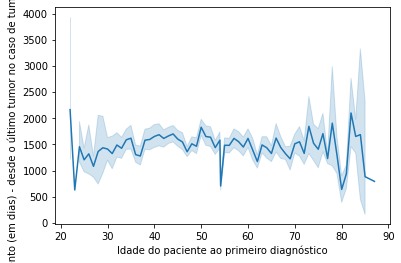

In [ ]:
#Gráfico gerado através do lineplot
sns.lineplot(data=tes2, x='Idade do paciente ao primeiro diagnóstico', y='Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]')



Nesse outro gráfico relacionamos a situação do paciente com sua idade e explicitamos o regime de tratamento utilizado de cada um

<Axes: xlabel='Última informação do paciente', ylabel='Idade do paciente ao primeiro diagnóstico'>

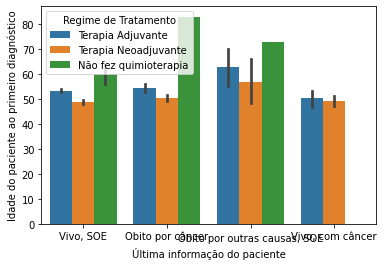

In [ ]:
#Gráfico gerado através do barplot

sns.barplot(data=tes2, x="Última informação do paciente", y="Idade do paciente ao primeiro diagnóstico", hue="Regime de Tratamento")

Por último, nesse gráfico tentamos enxergar a relação entre a lateralidade do tumor e o tempo desde o último tumor, e novamente tentamos explicitar qual foi o regime de tratamento utilizado

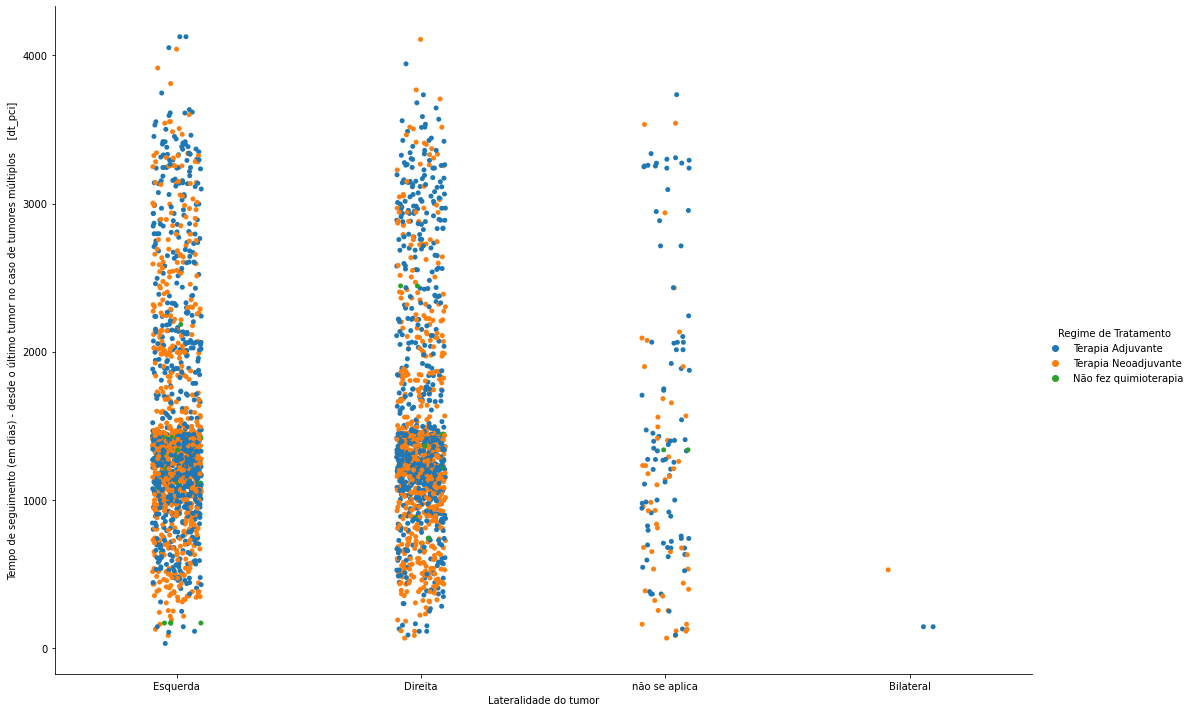

In [ ]:
#Gráfico gerado através do catplot


sns.catplot(data=tes2, x="Lateralidade do tumor", y="Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]", hue='Regime de Tratamento', aspect=10.7/7.3, height=10)

texto em itálico# **CODIFICAÇÃO**

CODIFICAÇÃO IDADE (label) E ÚLTIMA INFORMAÇÃO (one-hot)

In [ ]:
# #SETANDO O NUMERO DE CASAS DECIMAIS

# pd.set_option('display.precision',1)

# #transformando a coluna a seguir em inteiro
# tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].astype('int64')

# #dividindo as idades em intervalos, de forma que cada pessoa esteja em grupos com base nos intervalos estipulados
# tes['Idade COD'] = pd.cut(tes['Idade do paciente ao primeiro diagnóstico'], bins=[-1,1,30,45,60,89], labels=['-1','1','2','3','4'])
# print(tes.shape)
# #-1 -> NÃO INFORMADO
# # 1 = Idade entre 1~30 anos
# # 2 = Idade entre 30~45 anos
# # 3 = Idade entre 45~60 anos
# # 4 = Idade 60+ anos

#Setando casa decimais em 4
pd.set_option('display.precision',4)
#Transformando coluna em numerico
tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].astype('int64')
#Colocando mediana em valores vazios 
tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].replace(0, tes['Idade do paciente ao primeiro diagnóstico'].median())
#Scaler para normalizar os valores
scaler_norm = MinMaxScaler()
tes['Idade Normalizada'] = scaler_norm.fit_transform((tes['Idade do paciente ao primeiro diagnóstico']).values.reshape(-1, 1))

tes[['Idade Normalizada','Idade do paciente ao primeiro diagnóstico']]

#Excluindo a coluna 'Idade do paciente ao primeiro diagnóstico'

tes.drop(columns=['Idade do paciente ao primeiro diagnóstico'],inplace=True)

tes.isnull().sum()

<ipython-input-37-1b20322636ea>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].astype('int64')
<ipython-input-37-1b20322636ea>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].replace(0, tes['Idade do paciente ao primeiro diagnóstico'].median())
<ipython-input-37-1b20322636ea>:25: SettingWithCopyWarning: 
A

Record ID                                                                                           0
Duração_do_Tratamento                                                                               0
Última informação do paciente                                                                       0
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]       0
Regime de Tratamento                                                                                0
Classificação TNM Clínico - M                                                                       0
Classificação TNM Clínico - N                                                                       0
Classificação TNM Clínico - T                                                                       0
Lateralidade do tumor                                                                               0
Com recidiva à distância                                                          

In [ ]:
#Aplicação de lógica de OneHotEncoder para a seguinte coluna

ohe = OneHotEncoder()

# Adicionando as celulas vazias da coluna 'Última informação do paciente' o valor de 'Sem ultima informação'

tes['Última informação do paciente'].fillna("Sem ultima informação", inplace= True)

opa = ohe.fit_transform(tes['Última informação do paciente'].values.reshape(-1,1)).toarray()

dfohe = pd.DataFrame(opa, columns=['Vivo SOE', 'Obito por câncer','Vivo com câncer', 'Óbito por outras causas SOE'])
dfohe.shape
df = pd.concat([tes,dfohe], axis=1)
df.head()

<ipython-input-38-f00f6d6ed78d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Última informação do paciente'].fillna("Sem ultima informação", inplace= True)


,Record ID,Duração_do_Tratamento,Última informação do paciente,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Regime de Tratamento,Classificação TNM Clínico - M,Classificação TNM Clínico - N,Classificação TNM Clínico - T,Lateralidade do tumor,Com recidiva à distância,...,Data_do_tratamento,Intensidade do tumor,Tamanho do tumor,TNM T Intensidade,TNM T Tamanho,Idade Normalizada,Vivo SOE,Obito por câncer,Vivo com câncer,Óbito por outras causas SOE
1,710.0,3294.0,"Vivo, SOE",3294.0,Terapia Adjuvante,0,1,3,Esquerda,Não,...,2008-05-29,3.0,1.0,NaN,NaN,0.5538,1.0,0.0,0.0,0.0
6,1705.0,2224.0,Obito por câncer,2224.0,Terapia Adjuvante,0,1,1,Direita,Não,...,2007-12-06,2.0,1.0,NaN,NaN,0.3231,0.0,1.0,0.0,0.0
10,1960.0,699.0,"Vivo, SOE",699.0,Terapia Neoadjuvante,0,2,3,Direita,Não,...,2009-01-30,3.0,1.0,NaN,NaN,0.1077,1.0,0.0,0.0,0.0
16,2157.0,385.0,"Vivo, SOE",385.0,Terapia Adjuvante,0,0,1,Direita,Não,...,2008-09-27,1.0,0.0,NaN,NaN,0.4462,0.0,1.0,0.0,0.0
29,2864.0,4592.0,"Vivo, SOE",1839.0,Terapia Neoadjuvante,0,1,2,Esquerda,Não,...,2010-01-21,2.0,2.0,NaN,NaN,0.2615,0.0,1.0,0.0,0.0


CODIFICAÇÃO TEMPO DE SEGUIMENTO (LABEL)

In [ ]:
df

,Record ID,Duração_do_Tratamento,Última informação do paciente,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Regime de Tratamento,Classificação TNM Clínico - M,Classificação TNM Clínico - N,Classificação TNM Clínico - T,Lateralidade do tumor,Com recidiva à distância,...,Data_do_tratamento,Intensidade do tumor,Tamanho do tumor,TNM T Intensidade,TNM T Tamanho,Idade Normalizada,Vivo SOE,Obito por câncer,Vivo com câncer,Óbito por outras causas SOE
1,710.0,3294.0,"Vivo, SOE",3294.0,Terapia Adjuvante,0,1,3,Esquerda,Não,...,2008-05-29,3.0,1.0,NaN,NaN,0.5538,1.0,0.0,0.0,0.0
6,1705.0,2224.0,Obito por câncer,2224.0,Terapia Adjuvante,0,1,1,Direita,Não,...,2007-12-06,2.0,1.0,NaN,NaN,0.3231,0.0,1.0,0.0,0.0
10,1960.0,699.0,"Vivo, SOE",699.0,Terapia Neoadjuvante,0,2,3,Direita,Não,...,2009-01-30,3.0,1.0,NaN,NaN,0.1077,1.0,0.0,0.0,0.0
16,2157.0,385.0,"Vivo, SOE",385.0,Terapia Adjuvante,0,0,1,Direita,Não,...,2008-09-27,1.0,0.0,NaN,NaN,0.4462,0.0,1.0,0.0,0.0
29,2864.0,4592.0,"Vivo, SOE",1839.0,Terapia Neoadjuvante,0,1,2,Esquerda,Não,...,2010-01-21,2.0,2.0,NaN,NaN,0.2615,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0


In [ ]:
#Fazendo label in code(Cria catecorias, ex: 1°, 2°, 3°) nas colunas 'Tempo ultimo tumor','Tempo_de_sobrevida' e 'Tempo_ate_recidiva'


df['Tempo ultimo tumor'] = pd.cut(df['Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]'], bins=[0,365,1095,1825,4000], labels=['1','2','3','4'])
df['Tempo_de_sobrevida'] = pd.cut(df['Duração_do_Tratamento'], bins=[0, 365, 1095, 1825, 4000], labels=['0 a 1 ano', '1 a 3 anos', '3 a 5 anos', '5+ anos'])

df['Tempo_ate_recidiva'] = df['Data de Recidiva'] - df['Data_do_tratamento']
df['Tempo_ate_recidiva'] = df['Tempo_ate_recidiva'].dt.days
df['Tempo_ate_recidiva'] = pd.cut(df['Tempo_ate_recidiva'], bins=[0, 365, 1095, 1825, 4000], labels=['0 a 1 ano', '1 a 3 anos', '3 a 5 anos', '5+ anos'])


# Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

pd.set_option('display.precision',4)

#df = df.drop(df[df['Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]'] == 0].index)

# scaler_norm_tempo = MinMaxScaler()
# df['Tempo ultimo tumor'] = scaler_norm_tempo.fit_transform((df['Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]']).values.reshape(-1, 1))

# df[['Tempo ultimo tumor']]
# df.drop(columns='Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]', inplace=True)
# df


print(df.isnull().sum())
print(df.shape)

Record ID                                                                                         991
Duração_do_Tratamento                                                                             991
Última informação do paciente                                                                     991
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]     991
Regime de Tratamento                                                                              991
Classificação TNM Clínico - M                                                                     991
Classificação TNM Clínico - N                                                                     991
Classificação TNM Clínico - T                                                                     991
Lateralidade do tumor                                                                             991
Com recidiva à distância                                                          

In [ ]:
df[['Tempo_ate_recidiva', 'Tempo_de_sobrevida']]

,Tempo_ate_recidiva,Tempo_de_sobrevida
1,5+ anos,5+ anos
6,5+ anos,5+ anos
10,NaN,1 a 3 anos
16,NaN,1 a 3 anos
29,NaN,NaN
...,...,...
3087,NaN,NaN
3090,NaN,NaN
3093,NaN,NaN
3099,NaN,NaN


CODIFICAÇÃO "JÁ FICOU GRÁVIDA" (ONE-HOT)

In [ ]:
# Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

#df['Já ficou grávida?'].fillna("Não Informado Gravida", inplace= True)
#ohegravida = ohe.fit_transform(df['Já ficou grávida?'].values.reshape(-1,1)).toarray()

#df_ohegravida = pd.DataFrame(ohegravida, columns=['Não Grávida','Não informado Grávida','Grávida'])

#df = pd.concat([df,df_ohegravida], axis=1)


CODIFICAÇÃO "REGIME DE TRATAMENTO" (ONE-HOT)

In [ ]:
# Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

df['Regime de Tratamento'].fillna("Não Informado Tratamento", inplace= True)
ohetrat = ohe.fit_transform(df['Regime de Tratamento'].values.reshape(-1,1)).toarray()


df_ohetrat = pd.DataFrame(ohetrat, columns=['Tratamento Não Informado','Terapia Adjuvante','Terapia Neoadjuvante'])
df = pd.concat([df,df_ohetrat], axis=1)


In [ ]:
df['Subtipo tumoral'].unique()

array([ 2.,  4.,  3.,  5.,  1., nan])

CODIFICAÇÃO SUBTIPO TUMORAL

In [ ]:
# Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

df['Subtipo tumoral'].fillna(0, inplace= True)
ohesubtipo = ohe.fit_transform(df['Subtipo tumoral'].values.reshape(-1,1)).toarray()


print(df['Subtipo tumoral'].unique())
df_ohesubtipo = pd.DataFrame(ohesubtipo, columns=['Subtipo indefinido','Subtipo tumoral 1','Subtipo tumoral 2','Subtipo tumoral 3','Subtipo tumoral 4', 'Subtipo tumoral 5'])
df = pd.concat([df,df_ohesubtipo], axis=1)
df = df.drop('Subtipo indefinido', axis=1)


[2. 4. 3. 5. 1. 0.]


CODIFICAÇÃO "LATERALIDADE DO TUMOR"

In [ ]:
# Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

df['Lateralidade do tumor'].fillna("Não Informado Lateralidade", inplace= True)
ohelateral = ohe.fit_transform(df['Lateralidade do tumor'].values.reshape(-1,1)).toarray()


df_ohelat = pd.DataFrame(ohelateral, columns=['Bilateral','Direita','Esquerda','Lateralidade Não informada','Lateralidade não se aplica'])



df = pd.concat([df,df_ohelat], axis=1)

df['Lateralidade do tumor']

1       Esquerda
6        Direita
10       Direita
16       Direita
29      Esquerda
          ...   
4534         NaN
4535         NaN
4537         NaN
4538         NaN
4539         NaN
Name: Lateralidade do tumor, Length: 4606, dtype: object

In [ ]:
print(df.isnull().sum())
print(df.shape)

Record ID                                                                                        1504
Duração_do_Tratamento                                                                            1504
Última informação do paciente                                                                    1504
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]    1504
Regime de Tratamento                                                                              513
Classificação TNM Clínico - M                                                                    1504
Classificação TNM Clínico - N                                                                    1504
Classificação TNM Clínico - T                                                                    1504
Lateralidade do tumor                                                                              66
Com recidiva à distância                                                          

CODIFICAÇÃO DAS RECIDIVAS (BINARY)

In [ ]:
df['Tempo_ate_recidiva'].unique()

['5+ anos', NaN, '3 a 5 anos', '0 a 1 ano', '1 a 3 anos']
Categories (4, object): ['0 a 1 ano' < '1 a 3 anos' < '3 a 5 anos' < '5+ anos']

In [ ]:
# Preenchendo as celulas vazias da coluna 'Com recidiva local' com "Não" e depois setando valores onde Não:0 e Sim:1
# e renomeando a coluna 'Com recidiva local' por 'Recidiva Local'

df['Com recidiva local'].fillna("Não", inplace= True)
df['Recidiva Local'] = df['Com recidiva local']
df["Recidiva Local"] = np.where(df["Com recidiva local"] == "Não", 0, 1)

# Preenchendo as celulas vazias da coluna 'Com recidiva Regional' com "Não" e depois setando valores onde Não:0 e Sim:1
# e renomeando a coluna 'Com recidiva Regional' por 'Recidiva Regional'

df['Com recidiva regional'].fillna("Não", inplace= True)
df['Recidiva Regional'] = df['Com recidiva regional']
df["Recidiva Regional"] = np.where(df["Com recidiva regional"] == "Não", 0, 1)

# Preenchendo as celulas vazias da coluna 'Com recidiva Distancia' com "Não" e depois setando valores onde Não:0 e Sim:1
# e renomeando a coluna 'Com recidiva Distancia' por 'Recidiva Distancia'

df['Com recidiva à distância'].fillna("Não", inplace= True)
df['Recidiva à distância'] = df['Com recidiva à distância']
df["Recidiva à distância"] = np.where(df["Com recidiva à distância"] == "Não", 0, 1)

# Preenchendo as celulas vazias da coluna 'Tempo_de_sobrevida' e 'Tempo_ate_recidiva' com "0 a 1 ano"

df['Tempo_de_sobrevida'].fillna('0 a 1 ano', inplace= True)

df['Tempo_ate_recidiva'].fillna('0 a 1 ano', inplace= True)

df.isnull().sum()


Record ID                                                                                        1504
Duração_do_Tratamento                                                                            1504
Última informação do paciente                                                                    1504
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]    1504
Regime de Tratamento                                                                              513
Classificação TNM Clínico - M                                                                    1504
Classificação TNM Clínico - N                                                                    1504
Classificação TNM Clínico - T                                                                    1504
Lateralidade do tumor                                                                              66
Com recidiva à distância                                                          

CODIFICAÇÃO "ESTADIO CLINICO" (LABEL)

In [ ]:
df.isnull().sum()

Record ID                                                                                        1504
Duração_do_Tratamento                                                                            1504
Última informação do paciente                                                                    1504
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]    1504
Regime de Tratamento                                                                              513
Classificação TNM Clínico - M                                                                    1504
Classificação TNM Clínico - N                                                                    1504
Classificação TNM Clínico - T                                                                    1504
Lateralidade do tumor                                                                              66
Com recidiva à distância                                                          

In [ ]:
# Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita
df.dropna(subset=['Record ID'])
 #label_encoder = LabelEncoder()
df['Estadio Clínico  '].fillna("IV", inplace= True)
df['Estadio Clínico  '].replace({0:"0"}, inplace= True)


# lista_i = df.index

# for i in lista_i:
#   df.loc[i, 'Estadio Clínico  '] = str(df.loc[i, 'Estadio Clínico  '])

# df['Estadio Clínico COD'] = label_encoder.fit_transform(df['Estadio Clínico  '])
# df['Estadio Clínico  '].unique()
# df['Estadio Clínico COD'].value_counts()
# 0 - 0
# I - 1
# IA - 2
# IB - 3
# IB1 - 4
# IB2- 5
# II - 6
# IIA - 7
# IIB - 8
# IIC- 9
# III- 10
# IIIA - 11
# IIIB - 12
# IIIC - 13
# IV - 14
# IVA - 15
# IVB - 16
# IVC - 17
# Y: NA - 18
# X : não foi possivel determinar - 19

#Mudado-----------------------------------------------------------------------------------

# One hot encoded na coluna 'Estadio Clínico'

ohe_v1 =ohe.fit_transform(df['Estadio Clínico  '].values.reshape(-1,1)).toarray()

XoneCod = pd.DataFrame(ohe_v1, columns = ['Estadío 0', 'Estadío I', 'Estadío IA', 'Estadío IB','Estadío IB1','Estadío IB2','Estadío II', 'Estadío IIA', 'Estadío IIB','Estadío III' , 'Estadío IIIA', 'Estadío IIIB', 'Estadío IIIC',
       'Estadío IV','Estadío IVA','Estadío IVB', 'Estadío IVC' ,'Estadío Indeterminado', 'Estadío Indeterminado2'])


df=pd.concat([df,XoneCod], axis=1)
df.drop(columns=['Estadio Clínico  '], inplace=True)



In [ ]:
df.shape

(4641, 63)

AQUI PERDE QUASE METADE DAS LINHAS 

In [ ]:
#df.dropna(how='any',axis=0, inplace=True)
#df.shape

In [ ]:
list((df['Classificação TNM Clínico - T'].unique()))

[3,
 1,
 2,
 '4B',
 '3A',
 '1A',
 '1B',
 'IS',
 4,
 '4D',
 '1C',
 'X - nao foi possivel determinar',
 '4A',
 '4C',
 '2B',
 'CDIS',
 '2A',
 'Y: Na',
 '3B',
 0,
 nan]

CODIFICAÇÃO "CLASSIFICAÇÃO TMN CLÍNICO" (ONE-HOT)

In [ ]:
#df['Classificação TNM Clínico - M'].replace({0:"0", 1:"1", 2:"2", 3:"3", 4:"4"}, inplace= True)

#X3 =ohe.fit_transform(df['Classificação TNM Clínico - M'].values.reshape(-1,1)).toarray()
#XoneCo = pd.DataFrame(X3, columns = ['Class_TMN_M_0', 'Class_TMN_M1', 'Class_TMN_MY','Class_TMN_MX','Class_TMN_M1B','Class_TMN_M_1A'])
#df=pd.concat([df,XoneCo], axis=1)
#df.drop(columns=['Classificação TNM Clínico - M'], inplace=True)
#df
#APENAS VALOrES 0 E 1 E NAO INDETERMINAOD (?)

# Substituindo os valores que antes eram int64 por object e as celulas que são nulas 
#São substituidas por "zTNM T Vazio"

df['Classificação TNM Clínico - T'].replace({0:"0", 1:"1", 2:"2", 3:"3", 4:"4"}, inplace= True)
df['Classificação TNM Clínico - T'].fillna("zTNM T Vazio", inplace= True)

# One hot encoded da coluna 'Classificação TNM Clínico - T'

X4 =ohe.fit_transform(df['Classificação TNM Clínico - T'].values.reshape(-1,1)).toarray()

XoneC = pd.DataFrame(X4, columns = ['Class_TMN_T_0','Class_TMN_T_1', 'Class_TMN_T_1A', 'Class_TMN_T_1B','Class_TMN_T_1C', 'Class_TMN_T_2','Class_TMN_T_2A','Class_TMN_T_2B', 'Class_TMN_T_3','Class_TMN_T_3A','Class_TNM_T_3B', 'Class_TMN_T_4', 'Class_TMN_T_4A', 'Class_TMN_T_4B', 'Class_TMN_T_4C', 'Class_TMN_T_4D', 'Class_TMN_T_CDIS','Class_TMN_T_IS', 'Class_TMN_T_INDETERMINADO','Class_TMN_T_INDETERMINADO2','TNM T VAZIO'])

df=pd.concat([df,XoneC], axis=1)

# Dropando as colunas 'Classificação TNM Clínico - T' e 'TNM T VAZIO'

df.drop(columns=['Classificação TNM Clínico - T'], inplace=True)
df.drop(columns=['TNM T VAZIO'], inplace=True)


# One hot encoded da coluna 'Classificação TNM Clínico - N'

df['Classificação TNM Clínico - N'].replace({0:"0", 1:"1", 2:"2", 3:"3", 4:"4"}, inplace= True)
df['Classificação TNM Clínico - N'].fillna("zTNM N Vazio", inplace= True)

X5 =ohe.fit_transform(df['Classificação TNM Clínico - N'].values.reshape(-1,1)).toarray()

Xone = pd.DataFrame(X5, columns = ['Class_TMN_N_0', 'Class_TMN_N_1','Class_TMN_N_1B', 'Class_TMN_N_2', 'Class_TMN_N_2A', 'Class_TMN_N_2B', 'Class_TMN_N_3', 'Class_TMN_N_3A', 'Class_TMN_N_3B', 'Class_TMN_N_3C',
 'Class_TMN_N_INDETERMINADO','Class_TMN_N_INDETERMINADO2','TNM N VAZIO'])


df=pd.concat([df,Xone], axis=1)

# Dropando as colunas 'Classificação TNM Clínico - N' e 'TNM N VAZIO'

df.drop(columns=['Classificação TNM Clínico - N'], inplace=True)
df.drop(columns=['TNM N VAZIO'], inplace=True)


print(df.shape)

# Dropando qualquer linha que tenha valor nulo
df.dropna(how='all',axis=0, inplace=True)

print(df.shape)

(4657, 93)
(4657, 93)


CODIFICAÇÃO "COMBINAÇÃO DE TRATAMENTOS" (ONE HOT)

In [ ]:
# Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

df['Combinação dos Tratamentos Realizados no Hospital'].fillna("Nenhum tratamento", inplace= True)

#Aqui eu pego a coluna 'Combinação dos Tratamentos Realizados no Hospital' e faço um One Hot Encoding, porem há tratamentos que se repetem
#Nas mesmas linhas, então para resolver isso uso o split para separar as strings repetidas da celula 

splittest=df['Combinação dos Tratamentos Realizados no Hospital'] .str.split('+',expand=True)
t =splittest.rename(columns={0:'Cirurgia',1:'Radio',2:'Quimio',3:'Hormonio'})
t.insert(4,'Nenhum_Trantamento',np.nan)
t.insert(5,'Outras_combinacoes',np.nan)

#Aqui eu localizo a celula que está na coluna errada e mando ela para a coluna certa
#'Outras combinações'=='Outras combinações' 

t.loc[t['Cirurgia']=='Outras combinações','Outras_combinacoes'] = 'Outras_combinacoes'
t['Outras_combinacoes']=t['Outras_combinacoes'].fillna(0)

#Mesma logica aplicada acima.
t.loc[(t['Cirurgia']=='Quimioterapia')|(t['Cirurgia']=='Quimio'),'Quimio'] = 'Quimio'
t['Quimio']=t['Quimio'].fillna(0)

#Mesma logica aplicada acima.
t.loc[t['Cirurgia']=='Hormonio','Hormonio'] = 'Hormonio'

#Mesma logica aplicada acima.
t.loc[(t['Cirurgia']=='Radio')|(t['Cirurgia']=='Radioterapia'),'Radio'] = 'Radio'

#Mesma logica aplicada acima.
t.loc[(t['Cirurgia']=='Nenhum_Trantamento'),'Nenhum_Trantamento'] = 'Nenhum_Trantamento'

#Aqui eu substituo valores vazios por '0'
t['Nenhum_Trantamento']=t['Nenhum_Trantamento'].replace({np.nan:0})

t.loc[(t['Radio']==' Quimioterapia'),'Quimio'] = 'Quimio'

#Aqui eu transformo as variaveis(Cirurgia, Outras_combinacoes, Quimio, Hormonio, Radio, Cirurgia) em 0 e 1

t.loc[(t['Cirurgia']!='Cirurgia')&(t['Cirurgia']!=' Cirurgia')&(t['Cirurgia']!='Cirurgia ')&(t['Cirurgia']!=' Cirurgia '),'Cirurgia'] = 0
 
t['Outras_combinacoes']=t['Outras_combinacoes'].replace({'Outras_combinacoes':1})

t['Quimio']=t['Quimio'].replace({'Quimio':1,' Quimio ':1,' Quimio':1})

t['Hormonio']=t['Hormonio'].replace({None:0,' Hormonio':1})

t['Radio']=t['Radio'].replace({None:0,' Radio ':1,'Radio':1,'Radio ':1})

t.loc[(t['Radio']!=0)&(t['Radio']!=1),'Radio'] = 1

t['Radio']=t['Radio'].replace({' Quimioterapia':0,' Radioterapia':'Radio'})

t['Cirurgia']=t['Cirurgia'].replace({'Cirurgia':1,' Cirurgia':1,'Cirurgia ':1,' Cirurgia ':1})

t.loc[(t['Quimio']!=0)&(t['Quimio']!=1),'Quimio'] = 1

df=pd.concat([df,t], axis=1)

# Excluo a coluna 'Combinação dos Tratamentos Realizados no Hospital'

df.drop(columns=['Combinação dos Tratamentos Realizados no Hospital'], inplace=True)

df.head(10)

list(df)

['Record ID',
 'Duração_do_Tratamento',
 'Última informação do paciente',
 'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]',
 'Regime de Tratamento',
 'Classificação TNM Clínico - M',
 'Lateralidade do tumor',
 'Com recidiva à distância',
 'Com recidiva regional',
 'Com recidiva local',
 'Subtipo tumoral',
 'Data de Recidiva',
 'Data_do_tratamento',
 'Intensidade do tumor',
 'Tamanho do tumor',
 'TNM T Intensidade',
 'TNM T Tamanho',
 'Idade Normalizada',
 'Vivo SOE',
 'Obito por câncer',
 'Vivo com câncer',
 'Óbito por outras causas SOE',
 'Tempo ultimo tumor',
 'Tempo_de_sobrevida',
 'Tempo_ate_recidiva',
 'Tratamento Não Informado',
 'Terapia Adjuvante',
 'Terapia Neoadjuvante',
 'Subtipo tumoral 1',
 'Subtipo tumoral 2',
 'Subtipo tumoral 3',
 'Subtipo tumoral 4',
 'Subtipo tumoral 5',
 'Bilateral',
 'Direita',
 'Esquerda',
 'Lateralidade Não informada',
 'Lateralidade não se aplica',
 'Recidiva Local',
 'Recidiva Regional',
 'Recidiva

CODIFICAÇÃO TNM - M (LABEL)

In [ ]:
# # Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

# df['Classificação TNM Clínico - M'].fillna("X - nao foi possivel determinar", inplace= True)

# for i in lista_i:
#   df.loc[i, 'Classificação TNM Clínico - M'] = str(df.loc[i, 'Classificação TNM Clínico - M'])

# df['Classificação TNM - M'] = label_encoder.fit_transform(df['Classificação TNM Clínico - M'])

# df
# #0 - 0
# #1 - 1
# #2 - 1A
# #3 - 1B
# #4 - X - nao foi possivel determinar
# #5 - Y: na


# df['Classificação TNM - M'].value_counts()

# Mudado-------------------------------------------------------------------------------------------------------------------------------------------------------------

CODIFICAÇÃO TNM - N (LABEL)

In [ ]:
# # Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

# df['Classificação TNM Clínico - N'].fillna("X - nao foi possivel determinar", inplace= True)

# for i in lista_i:
#   df.loc[i, 'Classificação TNM Clínico - N'] = str(df.loc[i, 'Classificação TNM Clínico - N'])

# df['Classificação TNM - N'] = label_encoder.fit_transform(df['Classificação TNM Clínico - N'])


# # 0 - 0 
# # 1 - 1
# # 2 - 1A
# # 3 - 1B
# # 4 - 2
# # 5 - 2A
# # 6 - 2B
# # 7 - 3
# # 8 - 3A
# # 9 - 3B
# # 10 - 3C
# # 11 - X -nao foi possivel determinar
# # 12 - Y: Na


# df.isnull().sum()

# Mudado-------------------------------------------------------------------------------------------------------------------------------------------------------------

CODIFICAÇÃO TNM - T (LABEL)

In [ ]:
# # Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita


# df['Classificação TNM Clínico - T'].fillna("X - nao foi possivel determinar", inplace= True)

# for i in lista_i:
#   df.loc[i, 'Classificação TNM Clínico - T'] = str(df.loc[i, 'Classificação TNM Clínico - T'])

# df['Classificação TNM - T'] = label_encoder.fit_transform(df['Classificação TNM Clínico - T'])


# # 0 - 0
# # 1 - 1
# # 2 - 1A
# # 3 - 1B
# # 4 - 1C
# # 5 - 1MIC
# # 6 - 2
# # 7 - 2A
# # 8 - 2B
# # 9 - 3
# # 10 - 3A 
# # 11 - 3B
# # 12 - 4
# # 13 - 4A
# # 14 - 4B
# # 15 - 4C
# # 16 - 4D
# # 17 - CDIS
# # 18 - CLIS
# # 19 - IS
# # 20 - X - nao foi possivel determinar
# # 21 - Y: Na
 
# df['Classificação TNM - T'].value_counts()

# Mudado-------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
print(df.isnull().sum())
df.shape


Record ID                                                                                        1555
Duração_do_Tratamento                                                                            1555
Última informação do paciente                                                                    1555
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]    1555
Regime de Tratamento                                                                              564
                                                                                                 ... 
Radio                                                                                               0
Quimio                                                                                              0
Hormonio                                                                                            0
Nenhum_Trantamento                                                                

(4657, 98)

In [ ]:
# #Correção de bugs observados

# df.isnull().sum()




# df_x = df.dropna(subset=['Vivo com Câncer','Grávida', 'Tempo ultimo tumor'])

# df_x.shape


# # VER COM O JOSE-----------------------------------------------------------------------------------------



In [ ]:
# display(df_x.head(5))

# **Criando Target**

In [ ]:
print(df['Última informação do paciente'].isnull().sum())


1555


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4657 entries, 1 to 4648
Data columns (total 98 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Record ID                                                                                      3102 non-null   float64       
 1   Duração_do_Tratamento                                                                          3102 non-null   float64       
 2   Última informação do paciente                                                                  3102 non-null   object        
 3   Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]  3102 non-null   float64       
 4   Regime de Tratamento                                                                           4093 no

In [ ]:
#Retirando os missings dessa coluna
df_teste = df.dropna(subset=['Última informação do paciente'])


In [ ]:
print(df_teste['Última informação do paciente'].isnull().sum())


0


In [ ]:
df_teste.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 1 to 4656
Data columns (total 98 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Record ID                                                                                      3102 non-null   float64       
 1   Duração_do_Tratamento                                                                          3102 non-null   float64       
 2   Última informação do paciente                                                                  3102 non-null   object        
 3   Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]  3102 non-null   float64       
 4   Regime de Tratamento                                                                           3102 no

In [ ]:
# Crio um novo DataFrame('df_teste') onde adiciono uma nova coluna chamada "target" que contém os valores da coluna "Record ID" do DataFrame 'df'.

df_teste = df.assign(target = df['Record ID'])

print(df_teste['Última informação do paciente'].unique())

# Removo do DataFrame 'df_teste' as linhas em que a coluna "Última informação do paciente" é igual a "Óbito por outras causas, SOE".

df_teste = df_teste.drop(df[df['Última informação do paciente'] == 'Óbito por outras causas, SOE'].index)

# Removo do DataFrame 'df_teste' as linhas em que a coluna "Última informação do paciente" contém valores nulos (NaN). 

df_teste = df_teste.drop(df[df['Última informação do paciente'].isnull()].index)

print(df_teste['Última informação do paciente'].unique())



['Vivo, SOE' 'Obito por câncer' 'Óbito por outras causas, SOE'
 'Vivo, com câncer' nan]
['Vivo, SOE' 'Obito por câncer' 'Vivo, com câncer']


In [ ]:
lista_i = df_teste.index



In [ ]:
# função que localiza o index da 'Última informação do paciente' e se ele estiver vivo e com cancer
# ele localiza de esse paciente (index) tem alguma recidiva e retorna 0;
#se ele não tem recidiva e continua vivo, retorna 1
#se ele não tem recidiva e está morto, retorna 0


def funcao_target(df, i):
  if(df.loc[i, 'Última informação do paciente'] == 'Vivo, com câncer'):
    if (df.loc[i, 'Recidiva Local'] == 1 or df.loc[i, 'Recidiva Regional'] == 1 or df.loc[i, 'Recidiva à distância'] == 1):
      return 0
    else:
      return 1
  elif(df.loc[i, 'Última informação do paciente'] == 'Vivo, SOE'):
    return 1

  elif(df.loc[i, 'Última informação do paciente'] == 'Obito por câncer'):
    return 0


In [ ]:
df_teste.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3073 entries, 1 to 4656
Data columns (total 99 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Record ID                                                                                      3073 non-null   float64       
 1   Duração_do_Tratamento                                                                          3073 non-null   float64       
 2   Última informação do paciente                                                                  3073 non-null   object        
 3   Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]  3073 non-null   float64       
 4   Regime de Tratamento                                                                           3073 no

In [ ]:
df_teste.columns

Index(['Record ID', 'Duração_do_Tratamento', 'Última informação do paciente',
       'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]',
       'Regime de Tratamento', 'Classificação TNM Clínico - M',
       'Lateralidade do tumor', 'Com recidiva à distância',
       'Com recidiva regional', 'Com recidiva local', 'Subtipo tumoral',
       'Data de Recidiva', 'Data_do_tratamento', 'Intensidade do tumor',
       'Tamanho do tumor', 'TNM T Intensidade', 'TNM T Tamanho',
       'Idade Normalizada', 'Vivo SOE', 'Obito por câncer', 'Vivo com câncer',
       'Óbito por outras causas SOE', 'Tempo ultimo tumor',
       'Tempo_de_sobrevida', 'Tempo_ate_recidiva', 'Tratamento Não Informado',
       'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Subtipo tumoral 1',
       'Subtipo tumoral 2', 'Subtipo tumoral 3', 'Subtipo tumoral 4',
       'Subtipo tumoral 5', 'Bilateral', 'Direita', 'Esquerda',
       'Lateralidade Não informada', 'Lateralidade não se 

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3073 entries, 1 to 4656
Data columns (total 99 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Record ID                                                                                      3073 non-null   float64       
 1   Duração_do_Tratamento                                                                          3073 non-null   float64       
 2   Última informação do paciente                                                                  3073 non-null   object        
 3   Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]  3073 non-null   float64       
 4   Regime de Tratamento                                                                           3073 no

In [ ]:
df_teste['Tamanho do tumor'].isnull().sum()

52

In [ ]:
#Dropando da coluna 'Intensidade do tumor' os valores nulos.

df_teste.dropna(subset=['Intensidade do tumor'],inplace=True)

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3021 entries, 1 to 4656
Data columns (total 99 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Record ID                                                                                      3021 non-null   float64       
 1   Duração_do_Tratamento                                                                          3021 non-null   float64       
 2   Última informação do paciente                                                                  3021 non-null   object        
 3   Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]  3021 non-null   float64       
 4   Regime de Tratamento                                                                           3021 no

In [ ]:
df_teste['Intensidade do tumor'].isnull().sum()


0

In [ ]:
df_teste.columns

Index(['Record ID', 'Duração_do_Tratamento', 'Última informação do paciente',
       'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]',
       'Regime de Tratamento', 'Classificação TNM Clínico - M',
       'Lateralidade do tumor', 'Com recidiva à distância',
       'Com recidiva regional', 'Com recidiva local', 'Subtipo tumoral',
       'Data de Recidiva', 'Data_do_tratamento', 'Intensidade do tumor',
       'Tamanho do tumor', 'TNM T Intensidade', 'TNM T Tamanho',
       'Idade Normalizada', 'Vivo SOE', 'Obito por câncer', 'Vivo com câncer',
       'Óbito por outras causas SOE', 'Tempo ultimo tumor',
       'Tempo_de_sobrevida', 'Tempo_ate_recidiva', 'Tratamento Não Informado',
       'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Subtipo tumoral 1',
       'Subtipo tumoral 2', 'Subtipo tumoral 3', 'Subtipo tumoral 4',
       'Subtipo tumoral 5', 'Bilateral', 'Direita', 'Esquerda',
       'Lateralidade Não informada', 'Lateralidade não se 

In [ ]:
df_teste['Intensidade do tumor'].unique()

array([3., 2., 1., 4., 0.])

In [ ]:
df_teste['Tamanho do tumor'].info()


<class 'pandas.core.series.Series'>
Int64Index: 3021 entries, 1 to 4656
Series name: Tamanho do tumor
Non-Null Count  Dtype  
--------------  -----  
3021 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [ ]:
df_teste['Recidiva Local'].unique()


array([1., 0.])

In [ ]:
df_teste['Tempo_ate_recidiva'].unique()


['5+ anos', '0 a 1 ano', '3 a 5 anos', '1 a 3 anos']
Categories (4, object): ['0 a 1 ano' < '1 a 3 anos' < '3 a 5 anos' < '5+ anos']

In [ ]:
df_teste['Tempo_de_sobrevida'].unique()


['5+ anos', '1 a 3 anos', '0 a 1 ano', '3 a 5 anos']
Categories (4, object): ['0 a 1 ano' < '1 a 3 anos' < '3 a 5 anos' < '5+ anos']

In [ ]:
df_teste['Última informação do paciente'].unique()


array(['Vivo, SOE', 'Obito por câncer', 'Vivo, com câncer'], dtype=object)

In [ ]:
def logica_dos_cria(df,i):
  #info iniciais 
  info_iniciais_subtipo = 0.4
  if (df.loc[i, 'Tamanho do tumor'] == 1):
    info_iniciais_subtipo *= 0.1
  elif (df.loc[i,'Tamanho do tumor'] == 2):
    info_iniciais_subtipo *= 0.3
  elif (df.loc[i,'Tamanho do tumor'] == 3):
    info_iniciais_subtipo *= 0.6
  elif (df.loc[i,'Tamanho do tumor'] == 4):
    info_iniciais_subtipo *= 1
  elif(df.loc[i, 'Tamanho do tumor'] == 0):
    info_iniciais_subtipo *= 0.01


#calculando o fator de intensidade para a gravidade do tumor da paciente
  info_iniciais_intensidade = 0.4
  if (df.loc[i,'Intensidade do tumor'] == 1):
    info_iniciais_intensidade *= 0.1
  elif (df.loc[i,'Intensidade do tumor'] == 2):
    info_iniciais_intensidade *= 0.3
  elif (df.loc[i,'Intensidade do tumor'] == 3):
    info_iniciais_intensidade *= 0.6
  elif (df.loc[i,'Intensidade do tumor'] == 4):
    info_iniciais_intensidade *= 1
  elif(df.loc[i, 'Intensidade do tumor'] == 0):
    info_iniciais_subtipo *= 0.01



  gravidade = info_iniciais_subtipo + info_iniciais_intensidade



#calculando o fator final para mensurar o sucesso ou insucesso dependendo do estado atual e/ou recidiva e/ou tempo de sobrevida 
  ultima_info_paciente = 1
  if (df.loc[i,'Última informação do paciente'] == "Vivo, SOE"):
    return 1
  elif (df.loc[i,'Última informação do paciente'] == "Vivo, com câncer"):
    vivo_com_cancer = -0.4
    if (df.loc[i,'Recidiva Local'] == 1):
      recidiva_local = 0.2
      if(df.loc[i,'Tempo_ate_recidiva'] == '0 a 1 ano'):
        recidiva_local *= 1
      elif(df.loc[i,'Tempo_ate_recidiva'] == '1 a 3 anos'):
        recidiva_local *= 0.6
      elif(df.loc[i,'Tempo_ate_recidiva'] == '3 a 5 anos'):
        recidiva_local *= 0.2
      elif(df.loc[i,'Tempo_ate_recidiva'] == '5+ anos'):
        recidiva_local *= 0.05
      vivo_com_cancer *= recidiva_local


    elif(df.loc[i,'Recidiva Regional'] == 1):
      recidiva_regional = 0.2
      if(df.loc[i,'Tempo_ate_recidiva'] == '0 a 1 ano'):
        recidiva_regional *= 1
      elif(df.loc[i,'Tempo_ate_recidiva'] == '1 a 3 anos'):
        recidiva_regional *= 0.6
      elif(df.loc[i,'Tempo_ate_recidiva'] == '3 a 5 anos'):
        recidiva_regional *= 0.2
      elif(df.loc[i,'Tempo_ate_recidiva'] == '5+ anos'):
        recidiva_regional *= 0.05
      vivo_com_cancer *= recidiva_regional


    
    elif(df.loc[i,'Recidiva à distância'] == 1):
      recidiva_a_distancia = 0.2
      if(df.loc[i,'Tempo_ate_recidiva'] == '0 a 1 ano'):
        recidiva_a_distancia *= 1
      elif(df.loc[i,'Tempo_ate_recidiva'] == '1 a 3 anos'):
        recidiva_a_distancia *= 0.6
      elif(df.loc[i,'Tempo_ate_recidiva'] == '3 a 5 anos'):
        recidiva_a_distancia *= 0.2
      elif(df.loc[i, 'Tempo_ate_recidiva'] == '5+ anos'):
        recidiva_a_distancia *= 0.05

      vivo_com_cancer *= recidiva_a_distancia
      ultima_info_paciente *= vivo_com_cancer

  elif (df.loc[i, 'Última informação do paciente'] == 'Obito por câncer'):
    morto_por_cancer = -0.75
    if(df.loc[i, 'Tempo_de_sobrevida'] == '0 a 1 ano'):
        morto_por_cancer *= 1
    elif(df.loc[i, 'Tempo_de_sobrevida'] == '1 a 3 anos'):
        morto_por_cancer *= 0.6
    elif(df.loc[i, 'Tempo_de_sobrevida'] == '3 a 5 anos'):
        morto_por_cancer *= 0.2
    elif(df.loc[i, 'Tempo_de_sobrevida'] == '5+ anos'):
        morto_por_cancer *= 0.05
    
    ultima_info_paciente *= morto_por_cancer

  score = gravidade + ultima_info_paciente

  if score > 0:
    return 1
  else: 
    return 0

In [ ]:
lista_i = df_teste.index

In [ ]:
#Para cada linha do DataFrame o target recebe o valor da função a cima

for i in lista_i:
  df_teste.loc[i, 'target'] = logica_dos_cria(df_teste, i)

In [ ]:
print(df_teste['target'].isnull().sum())

0


In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3021 entries, 1 to 4656
Data columns (total 99 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Record ID                                                                                      3021 non-null   float64       
 1   Duração_do_Tratamento                                                                          3021 non-null   float64       
 2   Última informação do paciente                                                                  3021 non-null   object        
 3   Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]  3021 non-null   float64       
 4   Regime de Tratamento                                                                           3021 no

In [ ]:
df_teste['Tempo ultimo tumor']

1       4
6       4
10      2
16      2
29      4
       ..
4652    2
4653    2
4654    2
4655    2
4656    2
Name: Tempo ultimo tumor, Length: 3021, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [ ]:
# df_teste.drop(columns=['Vivo SOE', 'Vivo com Câncer', 'Óbito por outras causas SOE', 'Óbito por Câncer'], inplace=True)
# df_teste.drop(columns=['Tempo ultimo tumor'], inplace=True)
# df_teste.drop(df_teste['Tempo ultimo tumor'].isnull().index, inplace=True)

# df_teste2 = df_teste['Tempo ultimo tumor'].isnull()
# b = df_teste.loc[df_teste['Tempo ultimo tumor'].isnull()].index
# #a = df_teste.loc[df_teste['Tempo ultimo tumor']]

# df_teste3 = df_teste.drop(df_teste.loc[df_teste['Tempo ultimo tumor'].isnull()].index)
# df_teste3['Tempo ultimo tumor'].isnull().sum()

#Remove do DataFrame df_teste as linhas em que as colunas 'Tempo ultimo tumor' e 'Vivo SOE' que contém valores nulos (NaN).

df_teste.drop(df_teste.loc[df_teste['Tempo ultimo tumor'].isnull()].index, inplace=True)
df_teste.drop(df_teste.loc[df_teste['Vivo SOE'].isnull()].index, inplace=True)

In [ ]:
# Código teste para verificar a existência de missings

lista_c = df_teste.columns

for i in lista_c:
  print(i)
  print(df_teste[i].isnull().sum())
  print("\n\n")


Record ID
0



Duração_do_Tratamento
0



Última informação do paciente
0



Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]
0



Regime de Tratamento
0



Classificação TNM Clínico - M
0



Lateralidade do tumor
0



Com recidiva à distância
0



Com recidiva regional
0



Com recidiva local
0



Subtipo tumoral
0



Data de Recidiva
1580



Data_do_tratamento
11



Intensidade do tumor
0



Tamanho do tumor
0



TNM T Intensidade
1488



TNM T Tamanho
1488



Idade Normalizada
0



Vivo SOE
0



Obito por câncer
0



Vivo com câncer
0



Óbito por outras causas SOE
0



Tempo ultimo tumor
0



Tempo_de_sobrevida
0



Tempo_ate_recidiva
0



Tratamento Não Informado
0



Terapia Adjuvante
0



Terapia Neoadjuvante
0



Subtipo tumoral 1
0



Subtipo tumoral 2
0



Subtipo tumoral 3
0



Subtipo tumoral 4
0



Subtipo tumoral 5
0



Bilateral
0



Direita
0



Esquerda
0



Lateralidade Não informada
0



Lateralidade não se aplica
0



Rec

# **Separando teste e treino**

In [ ]:
#Através do comando dtypes, identificamos quais são as tabelas categóricas e numéricas

cont = 0
cont1 = 0
listacolcat = []
listacolcat1 = []
for coluna in df_teste.dtypes:
  if coluna == 'float64' or coluna == 'int64':
    tipo = "Coluna Númerica"
    listacolcat1.append(df_teste.columns[cont1])

  elif coluna == object:
      tipo = "Coluna Categórica"
      listacolcat.append(df_teste.columns[cont])
      
  # print(f'{df_teste.columns[cont]} é {tipo}\n========\n')
  cont+=1
  cont1+=1
print(f'{listacolcat1} é numerica')
print(f'{listacolcat} é categorica')

['Record ID', 'Duração_do_Tratamento', 'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]', 'Subtipo tumoral', 'Intensidade do tumor', 'Tamanho do tumor', 'TNM T Intensidade', 'TNM T Tamanho', 'Idade Normalizada', 'Vivo SOE', 'Obito por câncer', 'Vivo com câncer', 'Óbito por outras causas SOE', 'Tratamento Não Informado', 'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Subtipo tumoral 1', 'Subtipo tumoral 2', 'Subtipo tumoral 3', 'Subtipo tumoral 4', 'Subtipo tumoral 5', 'Bilateral', 'Direita', 'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica', 'Recidiva Local', 'Recidiva Regional', 'Recidiva à distância', 'Estadío 0', 'Estadío I', 'Estadío IA', 'Estadío IB', 'Estadío IB1', 'Estadío IB2', 'Estadío II', 'Estadío IIA', 'Estadío IIB', 'Estadío III', 'Estadío IIIA', 'Estadío IIIB', 'Estadío IIIC', 'Estadío IV', 'Estadío IVA', 'Estadío IVB', 'Estadío IVC', 'Estadío Indeterminado', 'Estadío Indeterminado2', 'Class_TMN_T_0', 'Clas

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 1 to 3100
Data columns (total 99 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Record ID                                                                                      2051 non-null   float64       
 1   Duração_do_Tratamento                                                                          2051 non-null   float64       
 2   Última informação do paciente                                                                  2051 non-null   object        
 3   Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]  2051 non-null   float64       
 4   Regime de Tratamento                                                                           2051 no

In [ ]:
df_teste.columns

Index(['Record ID', 'Duração_do_Tratamento', 'Última informação do paciente',
       'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]',
       'Regime de Tratamento', 'Classificação TNM Clínico - M',
       'Lateralidade do tumor', 'Com recidiva à distância',
       'Com recidiva regional', 'Com recidiva local', 'Subtipo tumoral',
       'Data de Recidiva', 'Data_do_tratamento', 'Intensidade do tumor',
       'Tamanho do tumor', 'TNM T Intensidade', 'TNM T Tamanho',
       'Idade Normalizada', 'Vivo SOE', 'Obito por câncer', 'Vivo com câncer',
       'Óbito por outras causas SOE', 'Tempo ultimo tumor',
       'Tempo_de_sobrevida', 'Tempo_ate_recidiva', 'Tratamento Não Informado',
       'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Subtipo tumoral 1',
       'Subtipo tumoral 2', 'Subtipo tumoral 3', 'Subtipo tumoral 4',
       'Subtipo tumoral 5', 'Bilateral', 'Direita', 'Esquerda',
       'Lateralidade Não informada', 'Lateralidade não se 

In [ ]:
# Cria-se um novo DataFrame que apenas contem as linhas onde a 'Terapia Adjuvante' e 'Terapia neoAdjuvante' seja igual a 1


new_df_teste = df_teste.loc[(df_teste['Terapia Adjuvante'] == 1) | (df_teste['Terapia Neoadjuvante'] == 1)]


# Cria-se um novo DataFrame com as colunas de interesse para o modelo

new_df_teste2 = new_df_teste[[
 'Idade Normalizada',
 'Tempo ultimo tumor',
 'Bilateral',
 'Direita',
 'Esquerda',
 'Lateralidade Não informada',
 'Lateralidade não se aplica',
 'Tamanho do tumor',
 'Intensidade do tumor',
#  'Estadío 0',
#  'Estadío I',
#  'Estadío IA',
#  'Estadío IB',
#  'Estadío IB1',
#  'Estadío IB2',
#  'Estadío II',
#  'Estadío IIA',
#  'Estadío IIB',
#  'Estadío III',
#  'Estadío IIIA',
#  'Estadío IIIB',
#  'Estadío IIIC',
#  'Estadío IV',
#  'Estadío IVA',
#  'Estadío IVB', 
#  'Estadío IVC',
#  'Estadío Indeterminado', 
#  'Estadío Indeterminado2',
#  'Class_TMN_T_1',
#  'Class_TMN_T_1A',
#  'Class_TMN_T_1B',
#  'Class_TMN_T_1C',
#  'Class_TMN_T_2',
#  'Class_TMN_T_2A',
#  'Class_TMN_T_2B',
#  'Class_TMN_T_3',
#  'Class_TMN_T_3A',
#  'Class_TNM_T_3B',
#  'Class_TMN_T_4',
#  'Class_TMN_T_4A',
#  'Class_TMN_T_4B',
#  'Class_TMN_T_4C',
#  'Class_TMN_T_4D',
#  'Class_TMN_T_CDIS',
#  'Class_TMN_T_IS',
#  'Class_TMN_T_INDETERMINADO',
#  'Class_TMN_T_INDETERMINADO2',
#  'Class_TMN_N_0',
#  'Class_TMN_N_1',
#  'Class_TMN_N_1B',
#  'Class_TMN_N_2',
#  'Class_TMN_N_2A',
#  'Class_TMN_N_2B',
#  'Class_TMN_N_3',
#  'Class_TMN_N_3A',
#  'Class_TMN_N_3B',
#  'Class_TMN_N_3C',
#  'Class_TMN_N_INDETERMINADO',
#  'Class_TMN_N_INDETERMINADO2',
 'Subtipo tumoral 1',
 'Subtipo tumoral 2',
 'Subtipo tumoral 3',
 'Subtipo tumoral 4',
 'Subtipo tumoral 5',
 'target'
]]



In [ ]:
new_df_teste2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 1 to 3100
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Idade Normalizada           2051 non-null   float64 
 1   Tempo ultimo tumor          2051 non-null   category
 2   Bilateral                   2051 non-null   float64 
 3   Direita                     2051 non-null   float64 
 4   Esquerda                    2051 non-null   float64 
 5   Lateralidade Não informada  2051 non-null   float64 
 6   Lateralidade não se aplica  2051 non-null   float64 
 7   Tamanho do tumor            2051 non-null   float64 
 8   Intensidade do tumor        2051 non-null   float64 
 9   Subtipo tumoral 1           2051 non-null   float64 
 10  Subtipo tumoral 2           2051 non-null   float64 
 11  Subtipo tumoral 3           2051 non-null   float64 
 12  Subtipo tumoral 4           2051 non-null   float64 
 13  Subtipo tumoral 5 

In [ ]:
from sklearn.model_selection import train_test_split

# Cria-se um Dataframe(df_adjuvante) que recebe apenas as linhas em que 'Terapia Adjuvante' seja 1
# Cria-se um Dataframe(df_neoadjuvante) que recebe apenas as linhas em que 'Terapia Neoadjuvante' seja 1

df_adjuvante = new_df_teste2.loc[(df_teste['Terapia Adjuvante'] == 1)]
df_neoadjuvante = new_df_teste2.loc[(df_teste['Terapia Neoadjuvante'] == 1)]

# x=new_df_teste2
# y=new_df_teste['target']

# Pegamos os DataFrames que criamos a cima e separamos em novos DataFrames
# onde os que começão com 'x' não tem a coluna target e as com 'y' contém apenas o target

x_adjuvante = df_adjuvante.drop(columns='target')
y_adjuvante = df_adjuvante['target']

x_neoadjuvante = df_neoadjuvante.drop(columns='target')
y_neoadjuvante = df_neoadjuvante['target']


#KNN
# x_knn = df_teste.drop(columns='Última informação do paciente')
# x_knn = df_teste[['Não Grávida', 'Grávida', 'Tratamento Não Informado', 'Não fez Quimioterapia', 'Paliativo', 'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Bilateral', 'Direita', 'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica','Estadio Clínico COD', 'C', 'C+Q', 'C+R+Q', 'C+R+Q+H', 'C+R', 'Nenhum Tratamento', 'Outras Combinações', 'Q', 'R', 'R+Q', 'Classificação TNM - M', 'Classificação TNM - N','Classificação TNM - T']]
# x_knn = df_teste[['Idade COD', 'Óbito por Câncer', 'Vivo SOE', 'Vivo com Câncer', 'Óbito por outras causas SOE', 'Tempo ultimo tumor', 'Não Grávida', 'Não informado Grávida', 'Grávida', 'Tratamento Não Informado', 'Não fez Quimioterapia', 'Paliativo', 'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Bilateral', 'Direita', 'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica', 'Recidiva Local', 'Recidiva Regional', 'Recidiva à distância', 'Estadio Clínico COD', 'C', 'C+Q', 'C+R+Q', 'C+R+Q+H', 'C+R', 'Nenhum Tratamento', 'Outras Combinações', 'Q', 'R', 'R+Q', 'Classificação TNM - M', 'Classificação TNM - N', 'Classificação TNM - T']]
# x_knn = x
# y_knn = df_teste['Última informação do paciente']
# y_knn = new_df_teste['target']



# x_treino_knn, x_teste_knn, y_treino_knn, y_teste_knn = train_test_split(x_knn, y_knn,
#                                                                         test_size=0.2,
#                                                                         random_state=1)

# Mesma logica a cima porem com knn, rf e svm quem são os modelos de predição


#ADJUVANTE

x_knn_adjuvante = x_adjuvante
y_knn_adjuvante = y_adjuvante

#Separando o modelo em treino e teste

x_treino_knn_adjuvante, x_teste_knn_adjuvante, y_treino_knn_adjuvante, y_teste_knn_adjuvante = train_test_split(x_knn_adjuvante, y_knn_adjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)

#NEOADJUVANTE

x_knn_neoadjuvante = x_neoadjuvante
y_knn_neoadjuvante = y_neoadjuvante

#Separando o modelo em treino e teste

x_treino_knn_neoadjuvante, x_teste_knn_neoadjuvante, y_treino_knn_neoadjuvante, y_teste_knn_neoadjuvante = train_test_split(x_knn_neoadjuvante, y_knn_neoadjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)
#SVM

#ADJUVANTE

x_svm_adjuvante = x_adjuvante
y_svm_adjuvante = y_adjuvante

#Separando o modelo em treino e teste

x_treino_svm_adjuvante, x_teste_svm_adjuvante, y_treino_svm_adjuvante, y_teste_svm_adjuvante = train_test_split(x_svm_adjuvante, y_svm_adjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)

#NEOADJUVANTE

x_svm_neoadjuvante = x_neoadjuvante
y_svm_neoadjuvante = y_neoadjuvante

#Separando o modelo em treino e teste

x_treino_svm_neoadjuvante, x_teste_svm_neoadjuvante, y_treino_svm_neoadjuvante, y_teste_svm_neoadjuvante = train_test_split(x_svm_neoadjuvante, y_svm_neoadjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)


#Random Forest
# x_rf = df_teste.drop(columns='Última informação do paciente')
# x_rf = df_teste[['Tratamento Não Informado', 'Não fez Quimioterapia', 'Paliativo', 'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Bilateral', 'Direita', 'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica','Estadio Clínico COD', 'C', 'C+Q', 'C+R+Q', 'C+R+Q+H', 'C+R', 'Nenhum Tratamento', 'Outras Combinações', 'Q', 'R', 'R+Q', 'Classificação TNM - M', 'Classificação TNM - N','Classificação TNM - T']]
# x_rf = df_teste[['Idade COD', 'Tempo ultimo tumor', 'Não Grávida', 'Não informado Grávida', 'Grávida', 'Bilateral', 'Direita', 'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica', 'Estadio Clínico COD', 'Classificação TNM - M', 'Classificação TNM - N', 'Classificação TNM - T']]
# x_rf = x

# y_rf = df_teste['Última informação do paciente']
# y_rf = new_df_teste['target']


# x_treino_rf, x_teste_rf, y_treino_rf, y_teste_rf = train_test_split(x_rf, y_rf,
#                                                                         test_size=0.2,
#                                                                         random_state=1)



#ADJUVANTE

x_rf_adjuvante = x_adjuvante
y_rf_adjuvante = y_adjuvante

#Separando o modelo em treino e teste

x_treino_rf_adjuvante, x_teste_rf_adjuvante, y_treino_rf_adjuvante, y_teste_rf_adjuvante = train_test_split(x_rf_adjuvante, y_rf_adjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)

#NEOADJUVANTE

x_rf_neoadjuvante = x_neoadjuvante
y_rf_neoadjuvante = y_neoadjuvante

#Separando o modelo em treino e teste

x_treino_rf_neoadjuvante, x_teste_rf_neoadjuvante, y_treino_rf_neoadjuvante, y_teste_rf_neoadjuvante = train_test_split(x_rf_neoadjuvante, y_rf_neoadjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Atribuindo o modelo Rf a variavel 'modelo_adjuvante' e depois é utilizada o '.fit'
#para treinar o modelo de aprendizado com dados de entrada x_adjuvante e saída esperada y_adjuvante

modelo_adjuvante = RandomForestClassifier(n_estimators=10)
modelo_adjuvante.fit(x_adjuvante, y_adjuvante)

RandomForestClassifier(n_estimators=10)

In [ ]:
# Atribuindo o modelo Rf a variavel 'modelo_neoadjuvante' e depois é utilizada o '.fit'
#para treinar o modelo de aprendizado com dados de entrada x_neoadjuvante e saída esperada y_neoadjuvante

modelo_neoadjuvante = RandomForestClassifier(n_estimators=10)
modelo_neoadjuvante.fit(x_neoadjuvante, y_neoadjuvante)

RandomForestClassifier(n_estimators=10)

In [ ]:
#feature_importances_ para encontrar a relação de cada coluna com o modelo
#Sejam inteligentes em entender o pq de cada coluna ter cada relação
lista = new_df_teste2.columns
lista_i = modelo_adjuvante.feature_importances_

for i in range(0, len(lista)-1):
  print(lista[i])
  print(lista_i[i])
  print("\n\n")

Idade Normalizada
0.25772101577885287



Tempo ultimo tumor
0.40277689781178677



Bilateral
6.43474619017953e-05



Direita
0.009085976787932007



Esquerda
0.016243283211625915



Lateralidade Não informada
0.0



Lateralidade não se aplica
0.005324091042350225



Tamanho do tumor
0.09573030852357278



Intensidade do tumor
0.13819635246183526



Subtipo tumoral 1
0.013322320552898207



Subtipo tumoral 2
0.02337104780659507



Subtipo tumoral 3
0.013444278486525022



Subtipo tumoral 4
0.014299361407103339



Subtipo tumoral 5
0.01042071866702072





In [ ]:
#feature_importances_ para encontrar a relação de cada coluna com o modelo
#Sejam inteligentes em entender o pq de cada coluna ter cada relação
lista = new_df_teste2.columns
lista_i = modelo_neoadjuvante.feature_importances_

for i in range(0, len(lista)-1):
  print(lista[i])
  print(lista_i[i])
  print("\n\n")

Idade Normalizada
0.257636101948308



Tempo ultimo tumor
0.40070761352955553



Bilateral
1.2292960662526626e-05



Direita
0.011948222092934856



Esquerda
0.01482635639316551



Lateralidade Não informada
0.0



Lateralidade não se aplica
0.005236486514862026



Tamanho do tumor
0.09881047492631029



Intensidade do tumor
0.12802931419995406



Subtipo tumoral 1
0.004719809029509027



Subtipo tumoral 2
0.022620399089538255



Subtipo tumoral 3
0.008974266874560122



Subtipo tumoral 4
0.021221906294199278



Subtipo tumoral 5
0.02525675614644028





##Tratando o desbalanceamento do target


KNN Adjuvante

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # metricas de validação
from sklearn.utils import class_weight

list_unique_target = y_treino_knn_adjuvante.unique()

# dict_teste = {'class_weight': 'balanced',
#               'classes': list_unique_target,
#               'y': y_treino_knn_adjuvante}

# weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = list_unique_target, y = y_treino_knn_adjuvante)
class_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_treino_knn_adjuvante)


knn = KNeighborsClassifier(n_neighbors=6, weights= 'distance')

# o modelo é ajustado aos dados de treinamento x_treino_knn_adjuvante e y_treino_knn_adjuvante.squeeze() usando o método fit().

knn.fit(x_treino_knn_adjuvante, y_treino_knn_adjuvante.squeeze())

# Agora geramos previsões para o conjunto de treinamento usando o método predict()
# e armazenadas na variável y_pred_treino_knn_adjuvante.

y_pred_treino_knn_adjuvante = knn.predict(x_treino_knn_adjuvante)

#Por fim geramos previsões para o conjunto de teste x_teste_knn_adjuvante, 
#as previsões são armazenadas na variável y_pred_knn_adjuvante.

y_pred_knn_adjuvante = knn.predict(x_teste_knn_adjuvante)


# Printamos a acuracia do modelo
print('Acc treino: ', knn.score(x_treino_knn_adjuvante, y_treino_knn_adjuvante ))
print('Acc teste: ', knn.score(x_teste_knn_adjuvante, y_teste_knn_adjuvante.squeeze() ))
print(classification_report(y_teste_knn_adjuvante, y_pred_knn_adjuvante))






Acc treino:  0.9976470588235294
Acc teste:  0.9107981220657277
              precision    recall  f1-score   support

         0.0       0.50      0.21      0.30        19
         1.0       0.93      0.98      0.95       194

    accuracy                           0.91       213
   macro avg       0.71      0.59      0.62       213
weighted avg       0.89      0.91      0.89       213



##SVM Adjuvante


In [ ]:
from sklearn import svm

list_unique_target = y_treino_knn_adjuvante.unique()
# class_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_treino_knn_adjuvante)
# class_weights = class_weight.compute_class_weight('balanced', list_unique_target, y_treino_svm_adjuvante)
# class_weight_dict = dict(enumerate(class_weights))

# clf=svm.SVC(C=1.0,kernel='rbf', class_weight='balanced')
clf=svm.SVC(C=1.0,kernel='rbf')

# ----------------------------------------------


# O método fit() é usado para treinar o modelo com as variáveis 'x_treino_svm_adjuvante', 'y_treino_svm_adjuvante'.
clf.fit(x_treino_svm_adjuvante,y_treino_svm_adjuvante)

# ----------------------------------------------


# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_treino_svm_adjuvante.
# O resultado dessa previsão é armazenado na variável y_treino_svm_adjuvante.
y_pred_treino=clf.predict(x_treino_svm_adjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_teste_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_treino_svm_adjuvante.
y_pred_teste=clf.predict(x_teste_svm_adjuvante)


# ----------------------------------------------

# Printando a Acuracia do modelo
print(y_pred_teste)
print(clf.score(x_treino_svm_adjuvante,y_treino_svm_adjuvante))
print(clf.score(x_teste_svm_adjuvante,y_teste_svm_adjuvante))
print(classification_report(y_teste_svm_adjuvante, y_pred_teste))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.9435294117647058
0.9295774647887324
              precision    recall  f1-score   support

         0.0       0.75      0.32      0.44        19
         1.0       0.94      0.99      0.96       194

    accuracy                           0.93       213
   macro avg       0.84      0.65      0.70       213
weighted avg       0.92      0.93      0.

###SVM NEOADJUVANTE

In [ ]:
from sklearn import svm

list_unique_target = y_treino_knn_neoadjuvante.unique()
# class_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_treino_knn_adjuvante)
# class_weights = class_weight.compute_class_weight('balanced', list_unique_target, y_treino_svm_adjuvante)
# class_weight_dict = dict(enumerate(class_weights))

clf=svm.SVC(C=1.0,kernel='rbf', class_weight='balanced')
# clf=svm.SVC(C=1.0,kernel='rbf')

# ----------------------------------------------


# O método fit() é usado para treinar o modelo com as variáveis 'x_treino_svm_adjuvante', 'y_treino_svm_adjuvante'.
clf.fit(x_treino_svm_neoadjuvante,y_treino_svm_neoadjuvante)

# ----------------------------------------------


# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_treino_svm_adjuvante.
# O resultado dessa previsão é armazenado na variável y_treino_svm_adjuvante.
y_pred_treino=clf.predict(x_treino_svm_neoadjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_teste_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_treino_svm_adjuvante.
y_pred_teste=clf.predict(x_teste_svm_neoadjuvante)


# ----------------------------------------------

# Printando a Acuracia do modelo
print(y_pred_teste)
print(clf.score(x_treino_svm_neoadjuvante,y_treino_svm_neoadjuvante))
print(clf.score(x_teste_svm_neoadjuvante,y_teste_svm_neoadjuvante))
print(classification_report(y_teste_svm_neoadjuvante, y_pred_teste))

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1.]
0.8949367088607595
0.9242424242424242
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        15
         1.0       1.00      0.92      0.96       183

    accuracy                           0.92       198
   macro avg       0.75      0.96      0.81       198
weighted avg       0.96      0.92      0.94       198



#**Método KNN**

**Método KNN Adjuvante**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # metricas de validação

knn = KNeighborsClassifier(n_neighbors=6)

# o modelo é ajustado aos dados de treinamento x_treino_knn_adjuvante e y_treino_knn_adjuvante.squeeze() usando o método fit().

knn.fit(x_treino_knn_adjuvante, y_treino_knn_adjuvante.squeeze())

# Agora geramos previsões para o conjunto de treinamento usando o método predict()
# e armazenadas na variável y_pred_treino_knn_adjuvante.

y_pred_treino_knn_adjuvante = knn.predict(x_treino_knn_adjuvante)

#Por fim geramos previsões para o conjunto de teste x_teste_knn_adjuvante, 
#as previsões são armazenadas na variável y_pred_knn_adjuvante.

y_pred_knn_adjuvante = knn.predict(x_teste_knn_adjuvante)


# Printamos a acuracia do modelo
print('Acc treino: ', knn.score(x_treino_knn_adjuvante, y_treino_knn_adjuvante ))
print('Acc teste: ', knn.score(x_teste_knn_adjuvante, y_teste_knn_adjuvante.squeeze() ))
print(classification_report(y_teste_knn_adjuvante, y_pred_knn_adjuvante))

Acc treino:  0.9435294117647058
Acc teste:  0.9389671361502347
              precision    recall  f1-score   support

         0.0       0.75      0.47      0.58        19
         1.0       0.95      0.98      0.97       194

    accuracy                           0.94       213
   macro avg       0.85      0.73      0.77       213
weighted avg       0.93      0.94      0.93       213



**KNN adjuvante com RandomSearch**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Setamos alguns valores para os hiperparametros para que o RandomSearch teste-os

param_grid_knn={
    'n_neighbors':[5,6,10,15,19],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30,40,50],
    'p':[1,2],
    'metric':['euclidean','manhattan','minkowski','chebyshev','mahalanobis'],

}


knn_grid=RandomizedSearchCV(knn,param_grid_knn,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

knn_grid.fit(x_treino_knn_adjuvante,y_treino_knn_adjuvante.squeeze())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=6), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev',
                                                   'mahalanobis'],
                                        'n_neighbors': [5, 6, 10, 15, 19],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
# Printa os melhores parametros

knn_grid.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 15,
 'metric': 'euclidean',
 'leaf_size': 40,
 'algorithm': 'ball_tree'}

In [ ]:
# Printa o melhor estimador

knn_grid.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, metric='euclidean',
                     n_neighbors=15, p=1)

In [ ]:
#Validação do Hiperparametro

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # metricas de validação



knn = KNeighborsClassifier(algorithm='brute', leaf_size=50, metric='manhattan',
                     n_neighbors=19, p=1)

knn.fit(x_treino_knn_adjuvante, y_treino_knn_adjuvante.squeeze())


y_pred_treino_knn_adjuvante = knn.predict(x_treino_knn_adjuvante)


y_pred_knn_adjuvante = knn.predict(x_teste_knn_adjuvante)
print('Acc treino: ', knn.score(x_treino_knn_adjuvante, y_treino_knn_adjuvante ))
print('Acc teste: ', knn.score(x_teste_knn_adjuvante, y_teste_knn_adjuvante.squeeze() ))
print(classification_report(y_teste_knn_adjuvante, y_pred_knn_adjuvante))



Acc treino:  0.94
Acc teste:  0.9248826291079812
              precision    recall  f1-score   support

         0.0       1.00      0.16      0.27        19
         1.0       0.92      1.00      0.96       194

    accuracy                           0.92       213
   macro avg       0.96      0.58      0.62       213
weighted avg       0.93      0.92      0.90       213



**Método KNN Neoadjuvante**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # metricas de validação

knn = KNeighborsClassifier(n_neighbors=6)

# o modelo é ajustado aos dados de treinamento x_treino_knn_neoadjuvante e y_treino_knn_neoadjuvante.squeeze() usando o método fit().
knn.fit(x_treino_knn_neoadjuvante, y_treino_knn_neoadjuvante.squeeze())

# Agora geramos previsões para o conjunto de treinamento usando o método predict()
# e armazenadas na variável y_pred_treino_knn_neoadjuvante.

y_pred_treino_knn_neoadjuvante = knn.predict(x_treino_knn_neoadjuvante)

#Por fim geramos previsões para o conjunto de teste x_teste_knn_neoadjuvante, 
#as previsões são armazenadas na variável y_pred_knn_neoadjuvante.

y_pred_knn_neoadjuvante = knn.predict(x_teste_knn_neoadjuvante)


# Printamos a acuracia do modelo
print('Acc treino: ', knn.score(x_treino_knn_neoadjuvante, y_treino_knn_neoadjuvante ))
print('Acc teste: ', knn.score(x_teste_knn_neoadjuvante, y_teste_knn_neoadjuvante.squeeze() ))
print(classification_report(y_teste_knn_neoadjuvante, y_pred_knn_neoadjuvante))

Acc treino:  0.9518987341772152
Acc teste:  0.9444444444444444
              precision    recall  f1-score   support

         0.0       0.62      0.67      0.65        15
         1.0       0.97      0.97      0.97       183

    accuracy                           0.94       198
   macro avg       0.80      0.82      0.81       198
weighted avg       0.95      0.94      0.95       198



**Random Search knn Neoadjuvante**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Setamos alguns valores para os hiperparametros para que o RandomSearch teste-os

param_grid_knn={
    'n_neighbors':[5,6,10,15,19],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30,40,50],
    'p':[1,2],
    'metric':['euclidean','manhattan','minkowski','chebyshev','mahalanobis'],

}



knn_grid_1=RandomizedSearchCV(knn,param_grid_knn,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

knn_grid_1.fit(x_treino_knn_neoadjuvante,y_treino_knn_neoadjuvante)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in sklearn.n

RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=6), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev',
                                                   'mahalanobis'],
                                        'n_neighbors': [5, 6, 10, 15, 19],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
# Printa os melhores parametros

knn_grid_1.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 15,
 'metric': 'minkowski',
 'leaf_size': 20,
 'algorithm': 'kd_tree'}

In [ ]:
# Printa o melhor estimador

knn_grid_1.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, n_neighbors=15)

In [ ]:
knn_grid_1.best_score_

0.9379746835443037

#**Método Random Forest**

**Método Random Forest Adjuvante**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 7, random_state=1)

# O método fit() é usado para treinar o modelo com as variáveis 'x_treino_rf_adjuvante', 'y_treino_rf_adjuvante'.
rf.fit(x_treino_rf_adjuvante, y_treino_rf_adjuvante)

# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_treino_rf_adjuvante.
# O resultado dessa previsão é armazenado na variável y_pred_treino_rf_adjuvante.

y_pred_treino_rf_adjuvante = rf.predict(x_treino_rf_adjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_teste_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_pred_rf_adjuvante.

y_pred_rf_adjuvante = rf.predict(x_teste_rf_adjuvante)


# Printando a Acuracia do modelo
print(y_pred_rf_adjuvante)
print( rf.score(x_treino_rf_adjuvante, y_treino_rf_adjuvante) )
print( rf.score(x_teste_rf_adjuvante, y_teste_rf_adjuvante) )
print(classification_report(y_teste_knn_adjuvante, y_pred_knn_adjuvante))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.9623529411764706
0.92018779342723
              precision    recall  f1-score   support

         0.0       1.00      0.16      0.27        19
         1.0       0.92      1.00      0.96       194

    accuracy                           0.92       213
   macro avg       0.96      0.58      0.62       213
weighted avg       0.93      0.92      0.90

**Random Forest Adjuvante com RandomSearch**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Setamos alguns valores para os hiperparametros para que o RandomSearch teste-os

param_grid_rf={
    'n_estimators':[7,10,15,25,40,100,200,300,400,500],'criterion':["gini","entropy"],'max_depth':[10,30,50,70,100],'min_samples_split':[10,20,30,40,50,60],'min_samples_leaf':[2,5,10],'max_features':[10,30,50]
}
rf_tt=RandomForestClassifier()


rf1_grid=RandomizedSearchCV(rf_tt,param_grid_rf,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

rf1_grid.fit(x_treino_rf_adjuvante, y_treino_rf_adjuvante)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 30, 50, 70, 100],
                                        'max_features': [10, 30, 50],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60],
                                        'n_estimators': [7, 10, 15, 25, 40, 100,
                                                         200, 300, 400, 500]},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
# Printa os melhores parametros

rf1_grid.best_params_

{'n_estimators': 300,
 'min_samples_split': 60,
 'min_samples_leaf': 2,
 'max_features': 10,
 'max_depth': 70,
 'criterion': 'entropy'}

In [ ]:
# Printa os melhores parametros

rf1_grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=70, max_features=10,
                       min_samples_leaf=2, min_samples_split=60,
                       n_estimators=300)

**Método Random Forest Neoadjuvante**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 7)

# O método fit() é usado para treinar o modelo com as variáveis 'x_treino_rf_neoadjuvante', 'y_treino_rf_neoadjuvante'.

rf.fit(x_treino_rf_neoadjuvante, y_treino_rf_neoadjuvante)

# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_treino_rf_neoadjuvante.
# O resultado dessa previsão é armazenado na variável y_pred_treino_rf_neoadjuvante.

y_pred_treino_rf_neoadjuvante = rf.predict(x_treino_rf_neoadjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_teste_rf_neoadjuvante. O resultado dessa previsão é armazenado na variável y_pred_rf_neoadjuvante.

y_pred_rf_neoadjuvante = rf.predict(x_teste_rf_neoadjuvante)


# Printando a Acuracia do modelo
print( rf.score(x_treino_rf_neoadjuvante, y_treino_rf_neoadjuvante) )
print( rf.score(x_teste_rf_neoadjuvante, y_teste_rf_neoadjuvante) )
print(classification_report(y_teste_knn_neoadjuvante, y_pred_knn_neoadjuvante))

0.9772151898734177
0.9646464646464646
              precision    recall  f1-score   support

         0.0       0.62      0.67      0.65        15
         1.0       0.97      0.97      0.97       183

    accuracy                           0.94       198
   macro avg       0.80      0.82      0.81       198
weighted avg       0.95      0.94      0.95       198



**Random Forest Neoadjuvante com GridSearch**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Setamos alguns valores para os hiperparametros para que o RandomSearch teste-os

param_grid_rf={
    'n_estimators':[7,10,15,25,40,100,200,300,400,500],'criterion':["gini","entropy"],'max_depth':[10,30,50,70,100],'min_samples_split':[10,20,30,40,50,60],'min_samples_leaf':[2,5,10],'max_features':[10,30,50]
}
rf_tt=RandomForestClassifier()


rf2_grid=RandomizedSearchCV(rf_tt,param_grid_rf,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

rf2_grid.fit(x_treino_rf_neoadjuvante, y_treino_rf_neoadjuvante)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 30, 50, 70, 100],
                                        'max_features': [10, 30, 50],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60],
                                        'n_estimators': [7, 10, 15, 25, 40, 100,
                                                         200, 300, 400, 500]},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
# Printa os melhores parametros

rf2_grid.best_params_

{'n_estimators': 300,
 'min_samples_split': 40,
 'min_samples_leaf': 2,
 'max_features': 50,
 'max_depth': 30,
 'criterion': 'entropy'}

#**Método SVM**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

**Método SVM Adjuvante**

In [ ]:
from sklearn import svm

clf=svm.SVC(C=1.0,kernel='rbf')

# ----------------------------------------------


# O método fit() é usado para treinar o modelo com as variáveis 'x_treino_svm_adjuvante', 'y_treino_svm_adjuvante'.
clf.fit(x_treino_svm_adjuvante,y_treino_svm_adjuvante)

# ----------------------------------------------


# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_treino_svm_adjuvante.
# O resultado dessa previsão é armazenado na variável y_treino_svm_adjuvante.
y_pred_treino=clf.predict(x_treino_svm_adjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_teste_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_treino_svm_adjuvante.
y_pred_teste=clf.predict(x_teste_svm_adjuvante)


# ----------------------------------------------

# Printando a Acuracia do modelo
print(y_pred_teste)
print(clf.score(x_treino_svm_adjuvante,y_treino_svm_adjuvante))
print(clf.score(x_teste_svm_adjuvante,y_teste_svm_adjuvante))
print(classification_report(y_teste_svm_adjuvante, y_pred_teste))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.9435294117647058
0.9295774647887324
              precision    recall  f1-score   support

         0.0       0.75      0.32      0.44        19
         1.0       0.94      0.99      0.96       194

    accuracy                           0.93       213
   macro avg       0.84      0.65      0.70       213
weighted avg       0.92      0.93      0.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Setamos alguns valores para os hiperparametros para que o GridSeach teste-os

param_grid_svm={
    'C':[1,2,3,4,5,6],'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'pré-computado'],'gamma':['scale', 'auto']}


svm_tt=svm.SVC(C=1.0)



svm_grid=GridSearchCV(svm_tt,param_grid_svm,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

svm_grid.fit(x_treino_svm_adjuvante, y_treino_svm_adjuvante)




Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_val

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                    'pré-computado']},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
# Printa os melhores parametros

svm_grid.best_params_

{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
# Printa o melhor estimador

svm_grid.best_estimator_

SVC(C=4)

**Método SVM Neoadjuvante**

In [ ]:
from sklearn import svm

clf=svm.SVC(C=1.0,kernel='rbf')

# ----------------------------------------------


# O método fit() é usado para treinar o modelo com as variáveis 'x_treino_svm_neoadjuvante', 'y_treino_svm_neoadjuvante'.
clf.fit(x_treino_svm_neoadjuvante,y_treino_svm_neoadjuvante)

# ----------------------------------------------


# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_treino_svm_neoadjuvante.
# O resultado dessa previsão é armazenado na variável y_treino_svm_neoadjuvante.
y_pred_treino=clf.predict(x_treino_svm_neoadjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_teste_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_treino_svm_neoadjuvante.
y_pred_teste=clf.predict(x_teste_svm_neoadjuvante)


# ----------------------------------------------

# Printando a Acuracia do modelo
print(y_pred_teste)
print(clf.score(x_treino_svm_neoadjuvante,y_treino_svm_neoadjuvante))
print(clf.score(x_teste_svm_neoadjuvante,y_teste_svm_neoadjuvante))
print(classification_report(y_teste_svm_neoadjuvante, y_pred_teste))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1.]
0.9354430379746835
0.9494949494949495
              precision    recall  f1-score   support

         0.0       0.86      0.40      0.55        15
         1.0       0.95      0.99      0.97       183

    accuracy                           0.95       198
   macro avg       0.91      0.70      0.76       198
weighted avg       0.95      0.95      0.94       198



**Grid Search SVM Neoadjuvante**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Setamos alguns valores para os hiperparametros para que o GridSeach teste-os

param_grid_svm={
    'C':[1,2,3,4,5,6],'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'pré-computado'],'gamma':['scale', 'auto']}


svm_tt=svm.SVC(C=1.0)



svm_grid=GridSearchCV(svm_tt,param_grid_svm,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

svm_grid.fit(x_treino_svm_neoadjuvante, y_treino_svm_neoadjuvante)




Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_val

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                    'pré-computado']},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#Setamos alguns valores para os hiperparametros para que o RandomSeach teste-os

param_grid_svm={
    'C':[1,2,3,4,5,6],'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'pré-computado'],'gamma':['scale', 'auto']}

svm_tt=svm.SVC(C=1.0)



svm_grid_neo=RandomizedSearchCV(svm_tt,param_grid_svm,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

svm_grid_neo.fit(x_treino_svm_neoadjuvante, y_treino_svm_neoadjuvante)




Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_valid

RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid',
                                                   'pré-computado']},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
# Printa os melhores parametros

svm_grid_neo.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 5}

In [ ]:
# Printa o melhor estimador

svm_grid_neo.best_estimator_

SVC(C=5)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#Setamos alguns valores para os hiperparametros para que o RandomSeach teste-os

param_grid_svm={
    'C':[1,2,3,4,5,6],'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'pré-computado'],'gamma':['scale', 'auto']}

svm_tt=svm.SVC(C=1.0)



svm_grid_adj=RandomizedSearchCV(svm_tt,param_grid_svm,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

svm_grid_adj.fit(x_treino_svm_adjuvante, y_treino_svm_adjuvante)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_valid

RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid',
                                                   'pré-computado']},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
# Printa os melhores parametros

svm_grid_adj.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 3}

In [ ]:
# Printa o melhor parametro

svm_grid_adj.best_estimator_

SVC(C=3)

# Rede neural

In [ ]:
# x_treino_nb_neoadjuvante.shape[0]

In [ ]:
# 
# x_treino_nb_neoadjuvante.shape[1]

In [ ]:
# df_teste[['Idade Normalizada', 'Com recidiva local', 'Com recidiva regional', 'Com recidiva à distância', 'Última informação do paciente']]

In [ ]:
# x_treino_nb_neoadjuvante.info()

In [ ]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Input(shape=(None, x_treino_nb_neoadjuvante.shape[0], x_treino_nb_neoadjuvante.shape[1])),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(2, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=['accuracy'])

In [ ]:
# model.fit(x_treino_nb_neoadjuvante, y_treino_nb_neoadjuvante, epochs=5)

# model.evaluate(x_teste_nb_neoadjuvante,  y_teste_nb_neoadjuvante, verbose=2)

Features levadas em consideração: 'Última informação do paciente', 'Tempo de sobrevida', 'Recidiva à distância', 'Recidiva local', 'Recidiva Regional', 'Tempo de Recidiva à distância', 'Tempo de Recidiva Regional', 'Tempo de Recidiva local', 'idade no início do tratamento', 'subtipo tumoral', 

In [ ]:
# #Normaliza o quão grave é o caso da paciente

# Informações Iniciais:
#   Subtipo inicial: 0.4
#     I -> 0.1
#     II -> 0.3
#     III -> 0.6
#     IV -> 1
  
#   Intensidade inicial:0.4
#     A -> 0.1
#     B -> 0.3
#     C -> 0.6
#     D -> 1


# Dada a gravidade do caso, calcula-se o multiplicador para cada caso

# Agora, calcula-se os fatores que indicam sucesso:

# Última informação do paciente: 1
  
#   Vivo, SOE -> Sucesso
  
  
#   Vivo com câncer: -0.2
        
#     Recidiva local: 0.2
#     #Tempo de recidiva é inversamente proporcional à existência de recidiva, logo adota-se valores baixos
#       Tempo até a recidiva:
#         0 a 1 ano -> 1
#         1 a 3 ano -> 0.6
#         3 a 5 anos -> 0.2
#         5+ anos -> 0.05
    
#     Recidiva regional: 0.4
#       Tempo até a recidiva:
#         0 a 1 ano -> 1
#         1 a 3 ano -> 0.6
#         3 a 5 anos -> 0.2
#         5+ anos -> 0.05
    
#     Recidiva à distância: 0.6
#       Tempo até a recidiva:
#         0 a 1 ano -> 1
#         1 a 3 ano -> 0.6
#         3 a 5 anos -> 0.2
#         5+ anos -> 0.05

#   Morto por câncer: -0.75
#     Tempo de Sobrevida:
#       0 a 1 ano -> 1
#       1 a 3 ano -> 0.6
#       3 a 5 anos -> 0.2
#       5+ anos -> 0.05



# Exemplo:

# Record ID - 123456
# Estadio Clinico - IIA
# Estadio Clinico 2 - IVB
# Última informação do paciente - Vivo com Câncer
# Recidiva - Local
# Tempo até Recidiva - 6 anos
# Tempo de Sobrevida - 8 anos

# Para as informações iniciais, com peso 0,3 tem-se:

# #Peso 0,4 para tamanho do tumor e intensidade, com pesos 0,3 e 0,1 para II e A, respectivamente
# gravidade do caso da paciente = (0,4 . 0,3 + 0,4 . 0,1) . 0,3 = 0,048

# Para a última informação da paciente, com peso 1, tem-se:

# #Peso -0,2 para ser Vivo com câncer, 0.2 por ser recidiva local e peso 0.05
# Cenário atual / final do tratamento = -0,2 . 0,2 . 0,05 = -0,002

# Resultado final = 0,046

###Tentativa de criar gráfico mostrando o quanto nosso modelo poderia ter sido útil na prática

In [ ]:
df_adjuvante_insucesso = (df_adjuvante.loc[df_adjuvante['target'] == 0])
df_adjuvante_insucesso['target']

392     0.0
393     0.0
452     0.0
459     0.0
465     0.0
       ... 
3007    0.0
3048    0.0
3056    0.0
3073    0.0
3091    0.0
Name: target, Length: 99, dtype: float64

In [ ]:
df_adjuvante_insucesso.columns

Index(['Idade Normalizada', 'Tempo ultimo tumor', 'Bilateral', 'Direita',
       'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica',
       'Tamanho do tumor', 'Intensidade do tumor', 'Subtipo tumoral 1',
       'Subtipo tumoral 2', 'Subtipo tumoral 3', 'Subtipo tumoral 4',
       'Subtipo tumoral 5', 'target'],
      dtype='object')

In [ ]:
df_neoadjuvante_insucesso = (df_neoadjuvante.loc[df_neoadjuvante['target'] == 0])
df_neoadjuvante_insucesso['target']

35      0.0
249     0.0
293     0.0
454     0.0
463     0.0
       ... 
2904    0.0
3044    0.0
3063    0.0
3086    0.0
3098    0.0
Name: target, Length: 85, dtype: float64

In [ ]:
df_neoadjuvante_insucesso.columns


Index(['Idade Normalizada', 'Tempo ultimo tumor', 'Bilateral', 'Direita',
       'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica',
       'Tamanho do tumor', 'Intensidade do tumor', 'Subtipo tumoral 1',
       'Subtipo tumoral 2', 'Subtipo tumoral 3', 'Subtipo tumoral 4',
       'Subtipo tumoral 5', 'target'],
      dtype='object')

In [ ]:
# df_neoadjuvante_insucesso.drop(columns=['target'], inplace=True)

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

x_neoadjuvante_insucesso = df_neoadjuvante_insucesso.drop(columns='target')
y_neoadjuvante_insucesso = df_neoadjuvante_insucesso['target']

print(x_neoadjuvante_insucesso.columns)

rf = RandomForestClassifier(max_depth = 7)

# O método fit() é usado para treinar o modelo com as variáveis 'x_treino_rf_neoadjuvante', 'y_treino_rf_neoadjuvante'.

rf.fit(x_treino_rf_adjuvante, y_treino_rf_adjuvante)
rf.fit_transform(x_neoadjuvante_insucesso, y_neoadjuvante_insuceso)
# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_treino_rf_neoadjuvante.
# O resultado dessa previsão é armazenado na variável y_pred_treino_rf_neoadjuvante.

y_pred_rf_adjuvante = rf.predict(x_treino_rf_adjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_teste_rf_neoadjuvante. O resultado dessa previsão é armazenado na variável y_pred_rf_neoadjuvante.

y_pred_df_neoadjuvante_insucesso = rf.predict(x_neoadjuvante_insucesso)

# Printando a Acuracia do modelo
print( rf.score(x_treino_rf_neoadjuvante, y_treino_rf_neoadjuvante))
print(y_pred_rf_adjuvante)
# print( rf.score(x_teste_rf_neoadjuvante, y_teste_rf_neoadjuvante) )
# print(classification_report(y_teste_knn_neoadjuvante, y_pred_knn_neoadjuvante))

Index(['Idade Normalizada', 'Tempo ultimo tumor', 'Bilateral', 'Direita',
       'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica',
       'Tamanho do tumor', 'Intensidade do tumor', 'Subtipo tumoral 1',
       'Subtipo tumoral 2', 'Subtipo tumoral 3', 'Subtipo tumoral 4',
       'Subtipo tumoral 5'],
      dtype='object')


AttributeError: ignored